# PROYECTO EDA - EXPLORATORY DATA ANALYSIS
### Analisis dataset Big Startups

##### Chiara Totaro

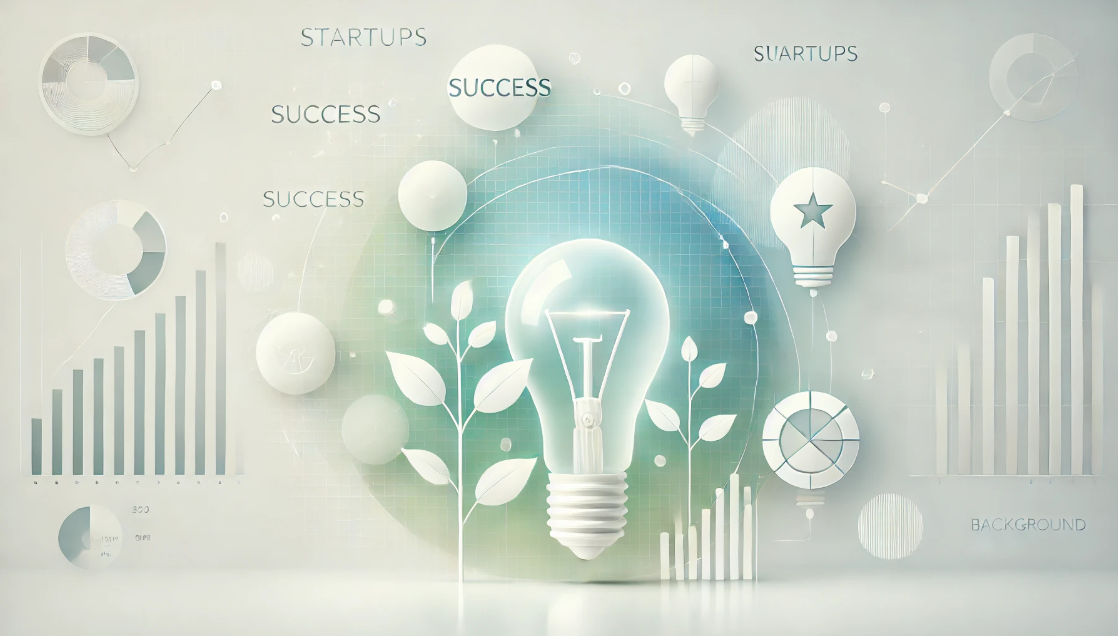

### #1 IMPORT LIBRERIAS

In [66]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bootcampviztools import *
from funciones import *
from scipy.stats import chi2_contingency
from scipy import stats

#### LOAD DATA

In [67]:
# Cargar el DataFrame y visualizo todas las columnas
df_startup = pd.read_csv("./data/big_startup_secsees_dataset.csv")
pd.set_option("display.max_columns", None) 

In [69]:
df_startup.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [70]:
# Información básica del DataFrame
print("Información básica del DataFrame:")
print(df_startup.info())

Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB
None


#### EDA - Preprocessing

In [71]:
# Elimino columnas no relevantes para mi analisis
df_startup.drop("permalink",axis=1,inplace=True)
df_startup.drop("homepage_url",axis=1,inplace=True)
df_startup.drop("state_code",axis=1,inplace=True)

In [72]:
df = df_startup.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               66367 non-null  object
 1   category_list      63220 non-null  object
 2   funding_total_usd  66368 non-null  object
 3   status             66368 non-null  object
 4   country_code       59410 non-null  object
 5   region             58338 non-null  object
 6   city               58340 non-null  object
 7   funding_rounds     66368 non-null  int64 
 8   founded_at         51147 non-null  object
 9   first_funding_at   66344 non-null  object
 10  last_funding_at    66368 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.6+ MB


#### #2 ANALISIS MISSING y TRANSFORMACION

Tabla de variables iniciales, con cantidad y porcentaje de missing y tipo antes del procesamiento y limpieza

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Descripción</th>
      <th>Valores totales</th>
      <th>Tipo</th>
      <th>Valores faltantes</th>
      <th>Porcentaje faltante (%)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>name</th>
      <td>Nombre de la startup</td>
      <td>66367</td>
      <td>object</td>
      <td>1</td>
      <td>0.001507</td>
    </tr>
    <tr>
      <th>category_list</th>
      <td>lista de categorías donde opera</td>
      <td>63220</td>
      <td>object</td>
      <td>3148</td>
      <td>4.743250</td>
    </tr>
    <tr>
      <th>funding_total_usd</th>
      <td>Financiacion total recibida (en dolares estadunidenses)</td>
      <td>66368</td>
      <td>object</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>status</th>
      <td>Indica si la compañia sigue operativa o no, o si ha tenido exito saliendo en bolsa o siendo adquirida</td>
      <td>66368</td>
      <td>object</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>country_code</th>
      <td>Codigo del pais -segun iso_alpha3-</td>
      <td>59410</td>
      <td>object</td>
      <td>6958</td>
      <td>10.483968</td>
    </tr>
    <tr>
      <th>region</th>
      <td>Indica la region donde se ha creado la startup</ts>
      <td>58338</td>
      <td>object</td>
      <td>8030</td>
      <td>12.099204</td>
    </tr>
    <tr>
      <th>city</th>
      <td>Indica la region donde se ha creado la startup</td>
      <td>58340</td>
      <td>object</td>
      <td>8028</td>
      <td>12.096191</td>
    </tr>
    <tr>
      <th>funding_rounds</th>
      <td>Numeros de rondas de financiacion</td>
      <td>66368</td>
      <td>int64</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>founded_at</th>
      <td>Fecha de creacion</td>
      <td>51147</td>
      <td>object</td>
      <td>15221</td>
      <td>22.934245</td>
    </tr>
    <tr>
      <th>first_funding_at</th>
      <td>Fecha de primera ronda de financiacion</td>
      <td>66344</td>
      <td>object</td>
      <td>24</td>
      <td>0.036162</td>
    </tr>
    <tr>
      <th>last_funding_at</th>
      <td>Fecha de la ultima ronda de financiacion recibida</td>
      <td>66368</td>
      <td>object</td>
      <td>0</td>
      <td>0.000000</td>
    </tr>
  </tbody>
</table>
</div>

In [73]:
#Funcion que me devuelve el porcentaje y la cantidad de missing 
# para monitorar despues de cada clean-processing
Calcular_missing(df)


Cantidad de valores nulos y porcentaje por columna:


,Valores totales,Tipo,Valores faltantes,Porcentaje faltante (%)
name,66367,object,1,0.001507
category_list,63220,object,3148,4.743250
funding_total_usd,66368,object,0,0.000000
status,66368,object,0,0.000000
country_code,59410,object,6958,10.483968
region,58338,object,8030,12.099204
city,58340,object,8028,12.096191
funding_rounds,66368,int64,0,0.000000
founded_at,51147,object,15221,22.934245
first_funding_at,66344,object,24,0.036162


In [74]:
# name tiene un missing: la fila contiene info, asigno un nombre para no perder la info
df['name'] = df['name'].fillna('NoName')

##### 2.1.1 ANALISIS MISSING y TRANSFORMACION FECHAS *founded_at* y *first_funding_at*

MISSING 
Los missing values de founded_at faltantes son el 22.9% del total, de fist_founding_at del 0.03%
 - los nulos no coinciden, es decir cuando no hay valor en founded_at, los hay en first_funding_at y viceversa --> 
    - sustituyo los valores missing de first_funding_at en founding_at y viceversa
 - Solo quedan 3 valores con nulos coincidentes, los elimino.


TRANFORMACION 
- Conversion de las fechas en Datetime
- Creacion de la columna *founded_at_year* (int) para mejor manejo para futuras analisis

- SLICING fechas :
  - elimino fechas superiores a 2025 --> elimino posibles anomalias
  - Decido eliminar las startup con fechas de creacion anterior al año 1980 para un mejor analisis comparando contextos economicos mas recientes


In [75]:
#Miro cantidad de nulos que coinciden en la fechas founded_at y first_funding_at
nulos_fechas = df[df[["founded_at","first_funding_at"]].isna().all(axis=1)]
len(nulos_fechas)

3

In [77]:
# Elimino los 3 registros que no tienen fechas en founded_at y first_funding_at
df = df.dropna(subset=['founded_at'])
df = df.dropna(subset=['first_funding_at'])

In [78]:
# Convierto las columnas de fechas en datatime format %Y-%m-%d.astype(int)
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce', format='%Y-%m-%d')

In [79]:
# Creo columnas de año de creacion (founded_at_year)
df['founded_at_year'] = df['founded_at'].dt.year

In [80]:
# SLICING eliminado startup de antes 1980 y posible valores anomalos con año de creacion >2025
df = df[(df["founded_at_year"] >= 1980) & (df["founded_at_year"] < 2025)]
df = df[(df["first_funding_at"] < '2025/01/01')]

In [81]:
#transformo la columna de year en int
df['founded_at_year'] = df['founded_at_year'].astype(int)
#ordeno el dataset segun la fecha de creacion de las startup
df.sort_values(by="founded_at", inplace=True)

In [82]:
#Miro cantidad de nulos que coinciden en country_code y region
nulos_country = df[df[["country_code","region"]].isna().all(axis=1)]
len(nulos_country)

3670

In [83]:
# drop de los Nan en country code
df = df.dropna(subset = "country_code")

##### 2.1.2 ANALISIS MISSING y TRANSFORMACION en *country_code*

Country_code utiliza el codigo iso alpha3

MISSING
 - Los missing en country_code corresponden a un 10% 
 - Coinciden tambien con los Nan de Region y city, con lo cual no tengo mas informacion para saber que valor attribuirle.
   - Decido eliminarlos

TRANSFORMACION
 - Creo una nueva columna *country* agrupando valores segun continente: 
   - USA
   - EU (agrupo todos los codigos de los paises de EU)
   - RDM Resto del Mundo : todos los restantes

  - De esta manera baja la cardinalidad de country y la puedo considerar variable categorica para futuras analisis
   

In [18]:
#Lista codigo iso alpha3 de los estados de Europa
#df["country_code"].unique()
col_EU = [      #european_countries_iso_alpha3
    "ALB",  # Albania
    "AND",  # Andorra
    "AUT",  # Austria
    "BLR",  # Belarus
    "BEL",  # Belgium
    "BIH",  # Bosnia and Herzegovina
    "BGR",  # Bulgaria
    "HRV",  # Croatia
    "CYP",  # Cyprus
    "CZE",  # Czech Republic
    "DNK",  # Denmark
    "EST",  # Estonia
    "FIN",  # Finland
    "FRA",  # France
    "DEU",  # Germany
    "GRC",  # Greece
    "HUN",  # Hungary
    "ISL",  # Iceland
    "IRL",  # Ireland
    "ITA",  # Italy
    "XKX",  # Kosovo
    "LVA",  # Latvia
    "LIE",  # Liechtenstein
    "LTU",  # Lithuania
    "LUX",  # Luxembourg
    "MLT",  # Malta
    "MDA",  # Moldova
    "MCO",  # Monaco
    "MNE",  # Montenegro
    "NLD",  # Netherlands
    "MKD",  # North Macedonia
    "NOR",  # Norway
    "POL",  # Poland
    "PRT",  # Portugal
    "ROU",  # Romania
    "SMR",  # San Marino
    "SRB",  # Serbia
    "SVK",  # Slovakia
    "SVN",  # Slovenia
    "ESP",  # Spain
    "SWE",  # Sweden
    "CHE",  # Switzerland
    "TUR",  # Turkey
    "UKR",  # Ukraine
    "GBR",  # United Kingdom
    "VAT"   # Vatican City (Holy See)
]

In [85]:
# Creo columna country agrupando las startup segun continente : 
# USA - EU - RDM Resto del mundo
df["country"] = df["country_code"].apply(
    lambda x: "USA" if x == "USA" else ("EU" if x in col_EU else "RDM")
)
df.country.value_counts(normalize=True)

country
USA    0.643510
EU     0.180605
RDM    0.175885
Name: proportion, dtype: float64

#### 2.1.3 ANALISIS MISSING y TRANSFORMACION en *region* y *city*

TRANSFORMACION
  - region y city nos dan la misma info (el 90% de los valores coindice totalmente), puedo agruparla y eliminar la columna city
   - Elimino la columna City y renombro la columan region : *region_city*

MISSING
 - Region y City tienen mismo % de missing : 12%
 - sostituyo los valores valores nulos en region_city y asigno la ciudad que corresponde a la moda del pais country_code

In [87]:
#analisis Valores Nulos en Region y city
nulos_region_city = df[df[["region","city"]].isna().any(axis=1)]

if len(nulos_region_city) == df.region.isna().sum():
    print("Los valores nulos coinciden en Region y City")


Los valores nulos coinciden en Region y City


In [88]:
# Renombro columna region y elimino columna city
df = df.rename(columns={'region': 'region_city'})
df.drop("city",axis=1,inplace=True)

In [89]:
# sostitucion valores nulos en region_city
# asigno la ciudad que corresponde a la moda del pais
moda_por_country = df.groupby('country_code')['region_city'].agg(lambda x: x.mode())
moda_por_country
df['region_city'] = df.apply(
    lambda row: row['region_city'] if pd.notnull(row['region_city']) else moda_por_country[row['country_code']],
    axis=1)

df['region_city'] = df['region_city'].astype(str)

#### 2.1.4 ANALISIS MISSING *category_list*

MISSING
 - El campo category_list presenta un 2.6%  de missing, le asigno "Other" 

TRANSFORMACION
 - Siendo el campo una lista de valores, La columna category_list contiene valores con varios campos, separados por | 
 - Para simplificar, creo una columna llamada *sector*, suponiendo que la primera descripción en la category_list se refiere a la categoría principal.
   - Se reduce la cardinalidad de category de un 41%  al 1,2%

In [90]:
#visualizo valores de category_list
df.category_list.value_counts(dropna=False, normalize=True)

category_list
Software                               0.064195
Biotechnology                          0.050207
E-Commerce                             0.019604
NaN                                    0.018216
Mobile                                 0.017426
                                         ...   
Broadcasting|Games                     0.000021
Babies|Baby Accessories|Parenting      0.000021
Construction|IT Management|Software    0.000021
Design|Security                        0.000021
Analytics|Retail Technology            0.000021
Name: proportion, Length: 21503, dtype: float64

In [91]:
es_category_nulo = df.category_list.isna()
es_category_nulo
#asigno valor Other a los Nan de category_list
df.loc[es_category_nulo, "category_list"] = "Other"

In [92]:
main_category = []
for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])
#creo columna sector donde solo se informa de la categoria principal
# para startups que tenian mas de un valor en category_list
df['sector'] = main_category

In [93]:
# baja la cardinalidad de la columan considerevolmente
print(f"cardinalidad columna category list original : {round(df.category_list.nunique()/len(df) *100, 2)} %")
print(f"cardinalidad columna main category : {round(df.sector.nunique()/len(df) * 100, 2)} %")

cardinalidad columna category list original : 45.92 %
cardinalidad columna main category : 1.51 %


#### 2.1.5 ANALISIS *funding_total_usd*

funding_total_usd es el total de financiamiento en dólares estadounidenses que ha recibido cada startups

TRANSFORMACION
 - Es de tipo str, lo transformo en numerico float.
 - los datos de la columnas funding_total_usd presentan una gran disparidad de valores, desde 1 hasta orden e+10. Ademas presentan una distribucion muy sesgada. 
 Para hacer los datos más manejables, y para la succesiva analisis visual, TRANSFORMO estos datos numéricos usando logaritmos en base 10 --> creacion de la columna : *funding_log*

MISSING
 - parece no haya NaN, pero despues de la transformacion en float, habia valores "-" que he transformado en NaN --> porcentaje de missing es del 17,5% (). Los elimino


In [94]:
# analisis columna funding_total_usd
df.funding_total_usd.value_counts(normalize=True)
# es un campo "O" y hay valores "-" 

funding_total_usd
-                   0.171465
1000000             0.017875
100000              0.015526
500000              0.015312
2000000             0.012215
                      ...   
2                   0.000021
276744.128711283    0.000021
5855.21916670863    0.000021
398995.795015664    0.000021
179999              0.000021
Name: proportion, Length: 14554, dtype: float64

In [95]:
# defino una funcion que transforme los "-" en NaN
# y convierta los datos en float

df['funding_total_usd'] = df['funding_total_usd'].apply(str_to_float)
df['funding_total_usd'].dtypes

dtype('float64')

In [96]:
# elimino los Nan de funding_total_usd
df = df.dropna(subset = "funding_total_usd")

In [97]:
# transformo los numeros en log10 para que sean mas manejables y creo nueva columna
df['funding_log'] =np.log10(df['funding_total_usd']) 
# df['funding_billions'] = df['funding_total_usd'] / 1e9 # transformo los numeros en Billions

In [98]:
#elimino outlier de funding_total : valor anomalo
df = df[df['funding_total_usd'] != df['funding_total_usd'].max()] 
df.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year,funding_log
count,3.879600e+04,38796.000000,38796,38796,38796,38796.000000,38796.000000
mean,1.793256e+07,2.052609,2008-06-11 08:41:29.823693056,2011-07-14 04:45:08.072997376,2012-11-10 17:15:29.786575872,2008.240283,6.267171
min,1.000000e+00,1.000000,1980-01-01 00:00:00,1984-01-01 00:00:00,1984-01-01 00:00:00,1980.000000,0.000000
25%,3.750000e+05,1.000000,2006-01-01 00:00:00,2009-10-14 00:00:00,2011-07-15 00:00:00,2006.000000,5.574031
50%,2.000000e+06,1.000000,2010-01-07 00:00:00,2012-05-25 00:00:00,2013-10-30 00:00:00,2010.000000,6.301030
75%,1.042730e+07,3.000000,2012-07-12 00:00:00,2014-01-28 00:00:00,2014-12-31 00:00:00,2012.000000,7.018172
max,8.207450e+09,19.000000,2015-12-23 00:00:00,2015-12-05 00:00:00,2105-05-01 00:00:00,2015.000000,9.914208
std,1.012971e+08,1.577729,NaN,NaN,NaN,5.693074,1.032786


## DATASET LIMPIO !!!!

#### TABLA DE DESCRIPCION DE LAS COLUMNAS DEL DATASET LIMPIO y con SLICING de los datos que vamos a analizar

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Valores totales</th>
      <th>Tipo</th>
      <th>Valores faltantes</th>
      <th>Porcentaje faltante (%)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>name</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>category_list</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>funding_total_usd</th>
      <td>38796</td>
      <td>float64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>status</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>country_code</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>region_city</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>funding_rounds</th>
      <td>38796</td>
      <td>int64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>founded_at</th>
      <td>38796</td>
      <td>datetime64[ns]</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>first_funding_at</th>
      <td>38796</td>
      <td>datetime64[ns]</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>last_funding_at</th>
      <td>38796</td>
      <td>datetime64[ns]</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>founded_at_year</th>
      <td>38796</td>
      <td>int64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>country</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>sector</th>
      <td>38796</td>
      <td>object</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>funding_log</th>
      <td>38796</td>
      <td>float64</td>
      <td>0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

### #3 Análisis Univariante
  - Categoricas : Moda, Frequencias (Absolutas y Relativas)
  - Numericas : Tendencias Central (mediana, media), rangos, posicion(percentiles-quartiles, IQR, CV), distribucion (histograma, densidad probabilidad)

#### Analisis Univariante :  VARIABLES CATEGORICAS

In [107]:
# Creo variable exit_status agrupando el status : IPO - salida a bolsa o acquired, 
# que son las dos condiciones de "EXIT" de una startup. 
col_exit=[ "ipo", "acquired"]
df["exit_status"] = df["status"].isin(col_exit)

df["exit_status"] = df["status"].apply(
    lambda x: "operating" if x == "operating" else ("exit" if x in col_exit else "closed")
)
df.exit_status.value_counts()

exit_status
operating    31412
exit          4679
closed        2705
Name: count, dtype: int64

In [108]:
#Variables Categoricas:
categoricas = [ "status",
               "exit_status",
               "country",
               #"region_city",
               #"funding_rounds",
               #"founded_at_year",
               #"sector"   
]

In [109]:
# Calculo la Moda
df[categoricas].mode().T

,0
status,operating
exit_status,operating
country,USA


##### FREQUENCIA ABSOLUTAS

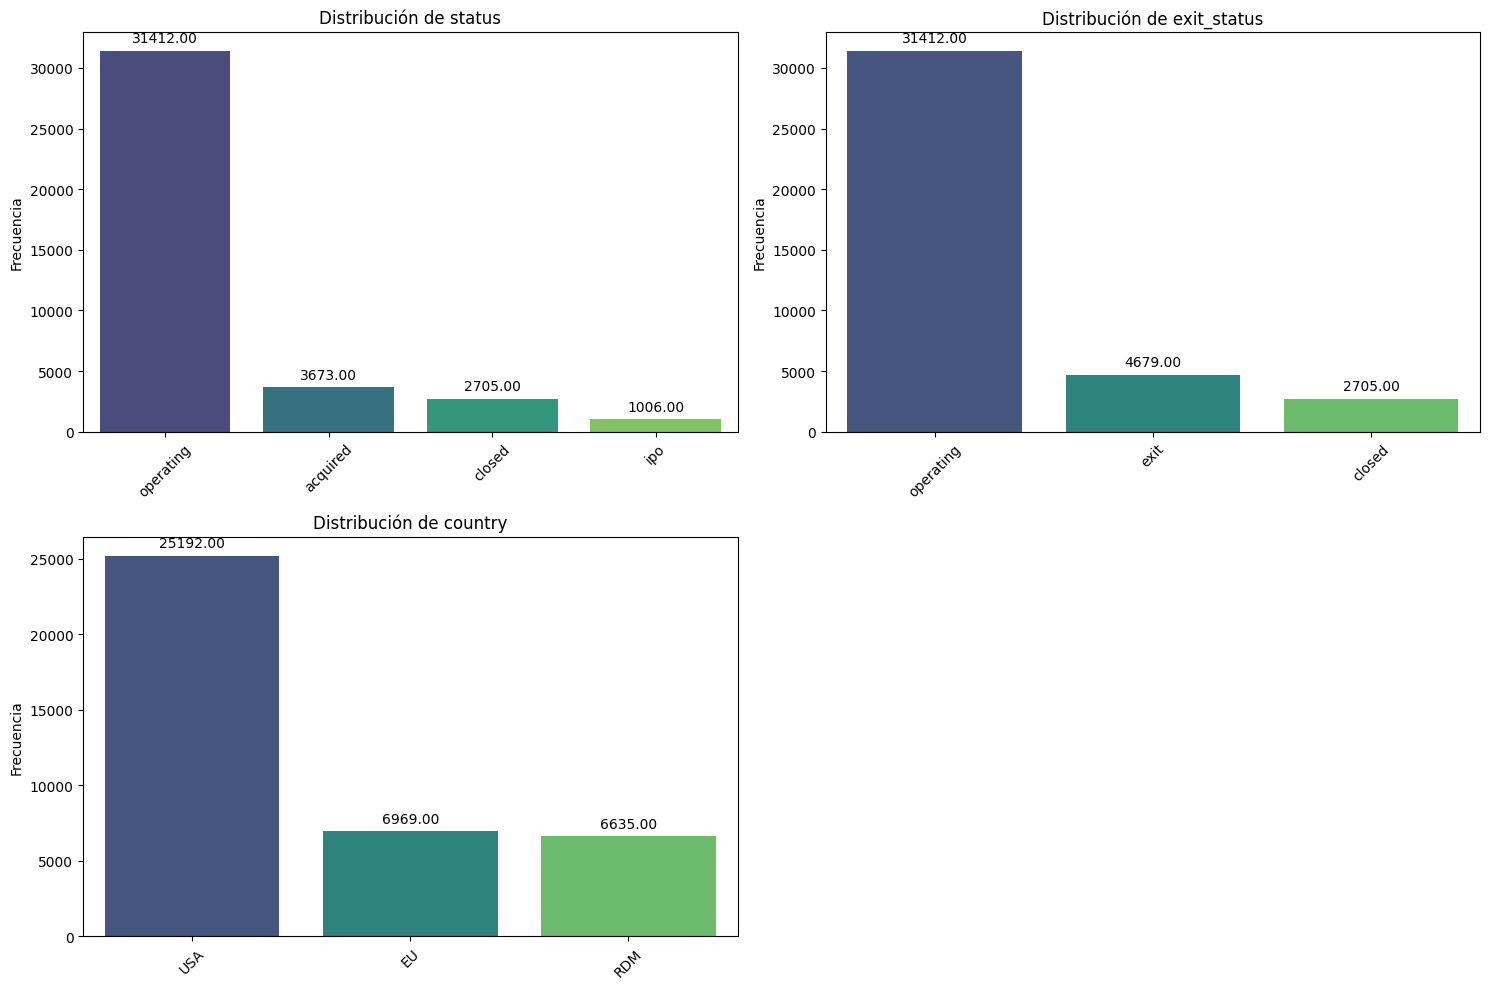

In [40]:
pinta_distribucion_categoricas(df, categoricas, mostrar_valores=True)

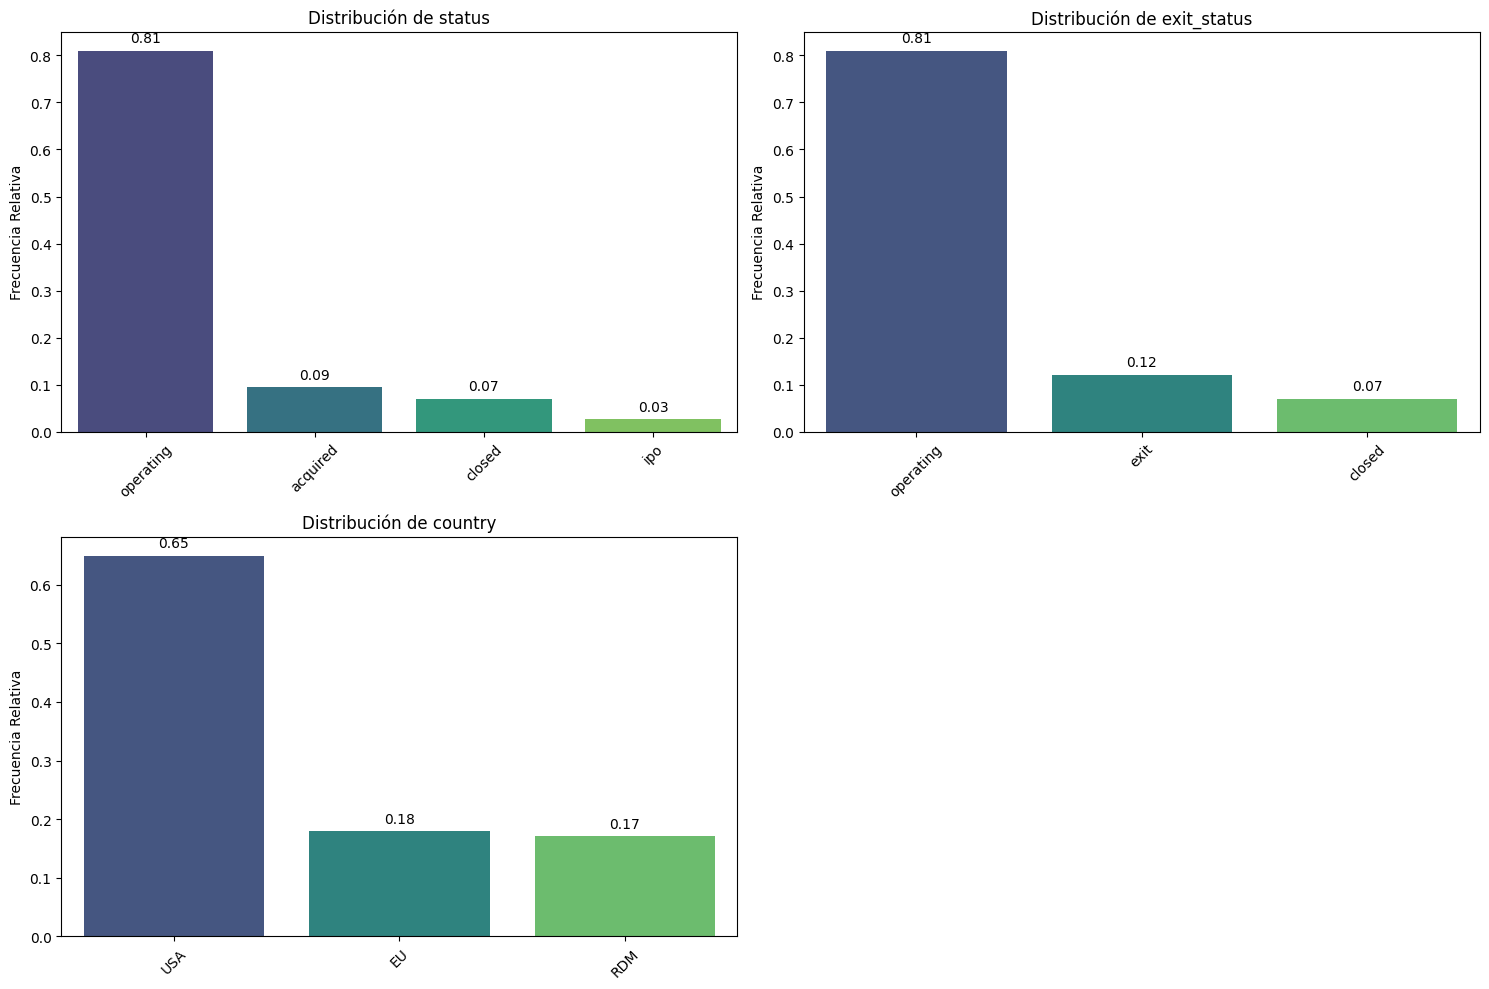

In [41]:
pinta_distribucion_categoricas(df, categoricas, relativa=True, mostrar_valores=True)

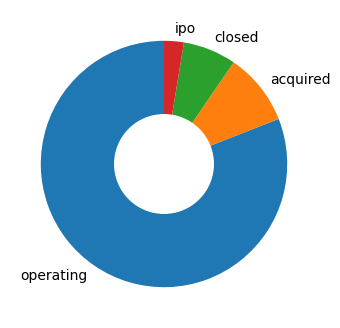

In [110]:
data = df["status"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values, #aqui ya calcula las frec rel
        labels=data.index,
         startangle= 90); 

my_circle =plt.Circle( (0,0),
                      0.4, #grosor del donut
                      color='white')
ax.add_artist(my_circle);


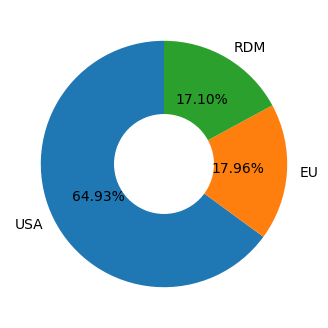

In [111]:
data = df["country"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values, #aqui ya calcula las frec rel
        labels=data.index,
        autopct='%.2f%%', startangle= 90); 

my_circle =plt.Circle( (0,0),
                      0.4, #grosor del donut
                      color='white')
ax.add_artist(my_circle);


In [129]:
#dataset filtrando solo los valores de exit y closed de status
filter_exit = df[df['exit_status'].isin(["exit", "closed"])]

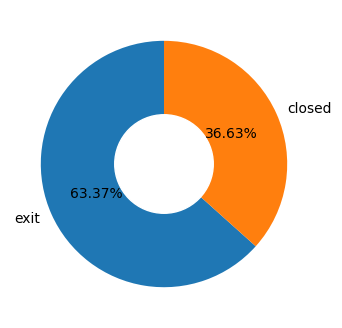

In [131]:
data = filter_exit["exit_status"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values, #aqui ya calcula las frec rel
        labels=data.index,
        autopct='%.2f%%',
         startangle= 90); 

my_circle =plt.Circle( (0,0),
                      0.4, #grosor del donut
                      color='white')
ax.add_artist(my_circle);

ANALISIS VARIABLES CON MUCHAS CATEGORIAS, HACIENDO SLICING

Numero de paises:  123
Numero de regiones:  970
Paises con mas de 100 startup:  27
Regiones con mas de 100 startup:  64


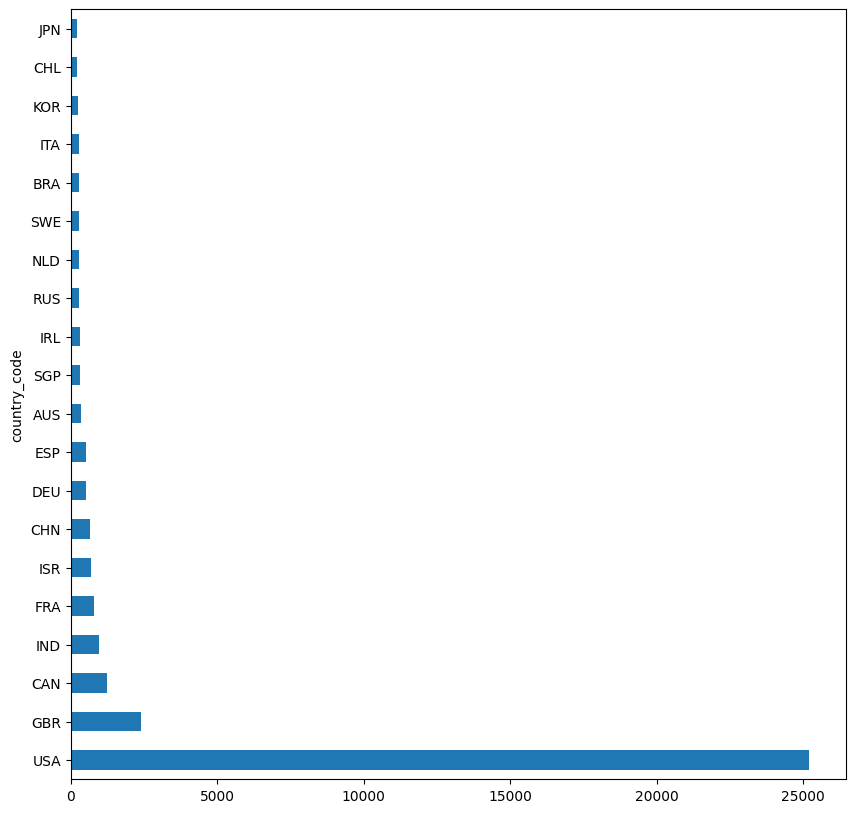

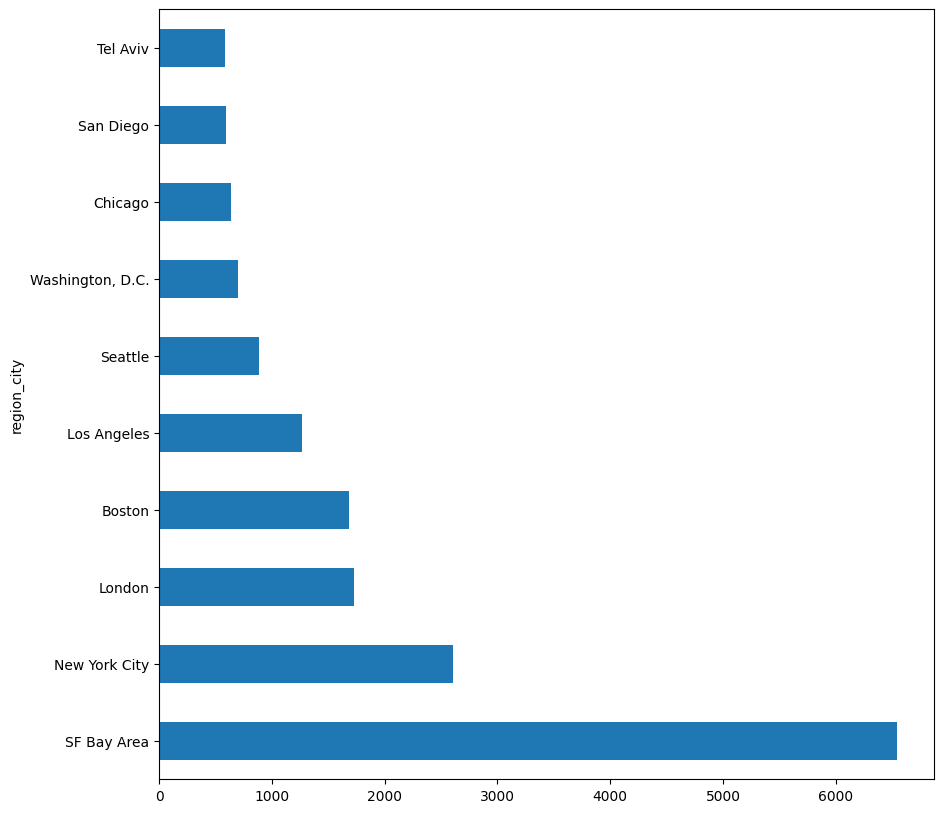

In [112]:
# ANALISIS paises donde mas startup se han creado
print("Numero de paises: ", len(set(df['country_code'])))
print("Numero de regiones: ", len(set(df['region_city'])))
print("Paises con mas de 100 startup: ",      
      str(sum(df['country_code'].value_counts() >= 100)))
print("Regiones con mas de 100 startup: ",      
      str(sum(df['region_city'].value_counts() >= 100)))
#visualizo los primeros 20 paises
fig, ax = plt.subplots(figsize = (10,10))
df['country_code'].value_counts()[:20].plot(kind='barh');
#visualizo los primeros 20 regiones con ams concentracionde startups
fig, ax = plt.subplots(figsize = (10,10))
df['region_city'].value_counts()[:10].plot(kind='barh');

Numero de sectores:  690
Sectores con mas de 1000 startup:  7
Sectores con menos de 10 startup:  412


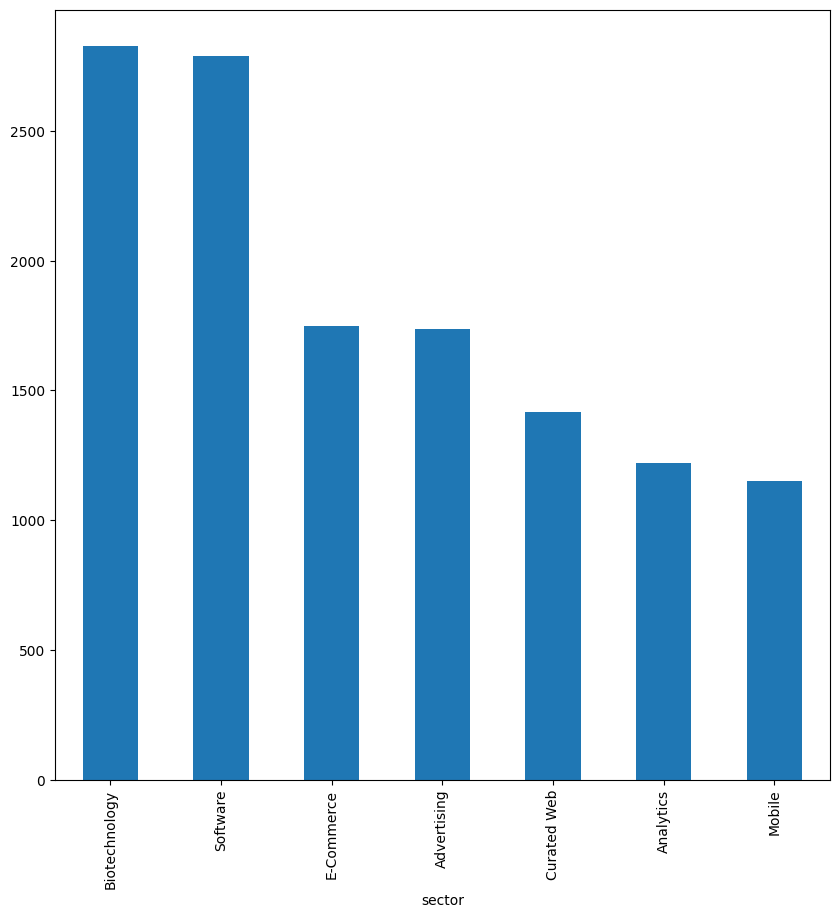

In [101]:
#ANALISIS sector donde mas startup se han creado
print("Numero de sectores: ", len(set(df['sector'])))
print("Sectores con mas de 1000 startup: ",      
      str(sum(df['sector'].value_counts() >= 1000)))
print("Sectores con menos de 10 startup: ",      
      str(sum(df['sector'].value_counts() <=10)))

#visualizo los primeros 7
fig, ax = plt.subplots(figsize = (10,10))
df['sector'].value_counts()[:7].plot(kind='bar');


In [106]:
conteos_sector = df['sector'].value_counts()[:7]
df_conteos_sector = conteos_sector.reset_index()
df_conteos_sector.columns = ['sector', 'Frecuencia_sector']
print(df_conteos_sector)

          sector  Frecuencia_sector
0  Biotechnology               2827
1       Software               2791
2     E-Commerce               1747
3    Advertising               1737
4    Curated Web               1417
5      Analytics               1221
6         Mobile               1153


In [47]:
df.country_code.value_counts()

country_code
USA    25192
GBR     2399
CAN     1234
IND      963
FRA      783
       ...  
LIE        1
IRN        1
PRI        1
HND        1
ALB        1
Name: count, Length: 123, dtype: int64

In [113]:
conteos = df['country_code'].value_counts(dropna=False)
df_conteos = conteos.reset_index()
df_conteos.columns = ['country_code', 'Frecuencia']
print(df_conteos)

    country_code  Frecuencia
0            USA       25192
1            GBR        2399
2            CAN        1234
3            IND         963
4            FRA         783
..           ...         ...
118          LIE           1
119          IRN           1
120          PRI           1
121          HND           1
122          ALB           1

[123 rows x 2 columns]


In [102]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [103]:
import plotly.express as px

# Crear un mapa coroplético
fig = px.choropleth(
    df_conteos,
    locations='country_code',          # Columna con códigos ISO
    color='Frecuencia',            # Columna con valores
    color_continuous_scale='blues',
    title='Frecuencia de Aparición por País'
)

fig.show()

#### Analisis Univariante :  VARIABLES NUMERICAS

In [114]:
df.describe().loc[["mean","50%", "25%", "75%", "std"]].T

,mean,50%,25%,75%,std
funding_total_usd,17932559.45384,2000000.0,375000.0,10427296.75,101297105.938058
funding_rounds,2.052609,1.0,1.0,3.0,1.577729
founded_at,2008-06-11 08:41:29.823693056,2010-01-07 00:00:00,2006-01-01 00:00:00,2012-07-12 00:00:00,NaN
first_funding_at,2011-07-14 04:45:08.072997376,2012-05-25 00:00:00,2009-10-14 00:00:00,2014-01-28 00:00:00,NaN
last_funding_at,2012-11-10 17:15:29.786575872,2013-10-30 00:00:00,2011-07-15 00:00:00,2014-12-31 00:00:00,NaN
founded_at_year,2008.240283,2010.0,2006.0,2012.0,5.693074
funding_log,6.267171,6.30103,5.574031,7.018172,1.032786


In [115]:
#Calculo IQR Indice
IQR_log = get_IQR(df,"funding_log")
#Calculo IQR Indice
IQR = get_IQR(df,"funding_total_usd")
print(f"IQR datos funding : {IQR} vs IQR datos en log10 : {IQR_log}")

IQR datos funding : 10052296.75 vs IQR datos en log10 : 1.4441404260667543


In [116]:
#Calculo Variabilidad
variabilidad(df)

,std,mean,Coef_Var
funding_total_usd,101297105.938058,17932559.45384,5.648781
funding_rounds,1.577729,2.052609,0.768646
founded_at,NaN,2008-06-11 08:41:29.823693056,NaN
first_funding_at,NaN,2011-07-14 04:45:08.072997376,NaN
last_funding_at,NaN,2012-11-10 17:15:29.786575872,NaN
founded_at_year,5.693074,2008.240283,0.002835
funding_log,1.032786,6.267171,0.164793


(2,)


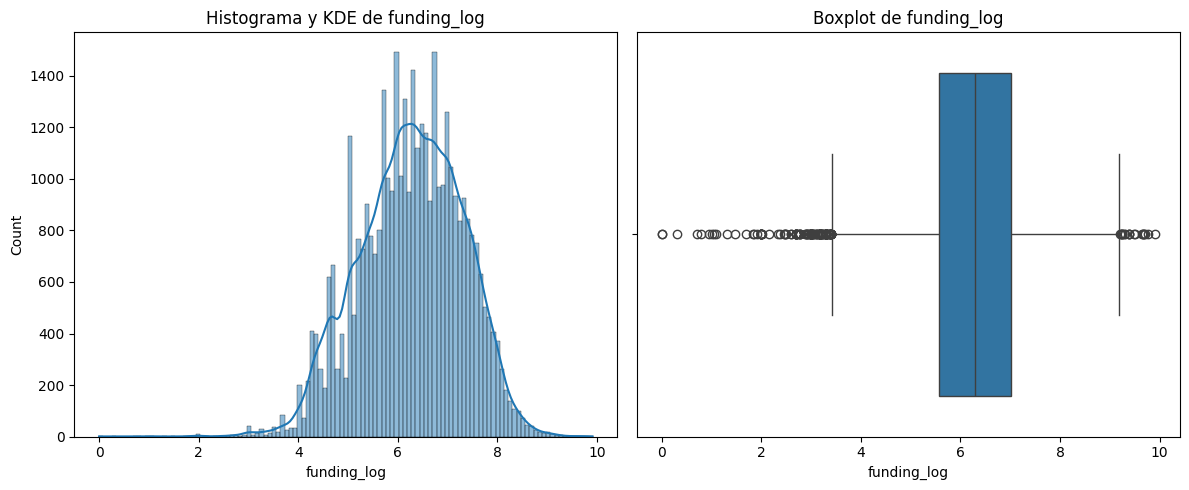

In [54]:
plot_combined_graphs(df, ["funding_log"], whisker_width= 1.5)

la variable funding_total_usd presentaba unos rangos y variabilidad enormes, por eso he decidido transformar los valores en log base 10, que permite manejarlo mejor, y, como se puede ver, ademas los distribuye segun una normal.

### Analisis Bivariante con variables categóricas

Analizaremos nuestra variable directora: 
 - exit_status - country y country_code
 - status - sector


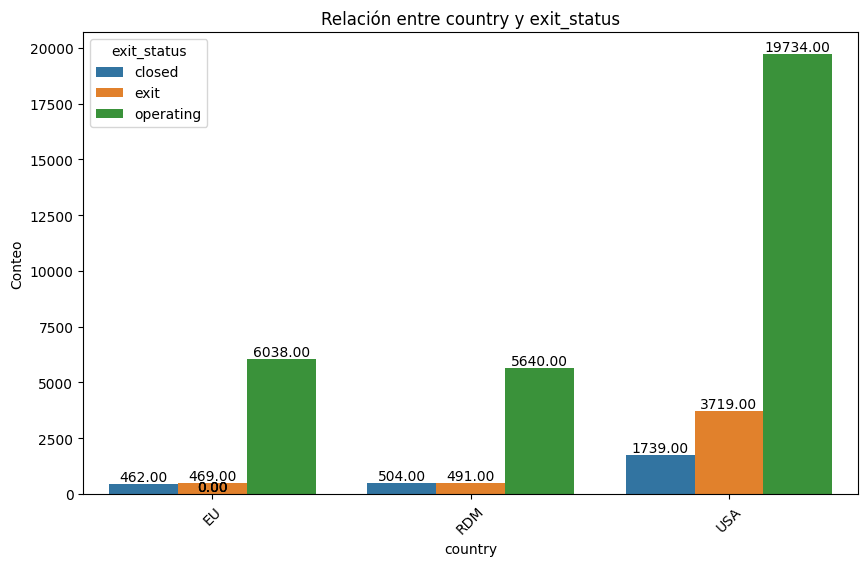

In [118]:
#ABSOLUTA
plot_categorical_relationship_fin(df, "country","exit_status", show_values= True)

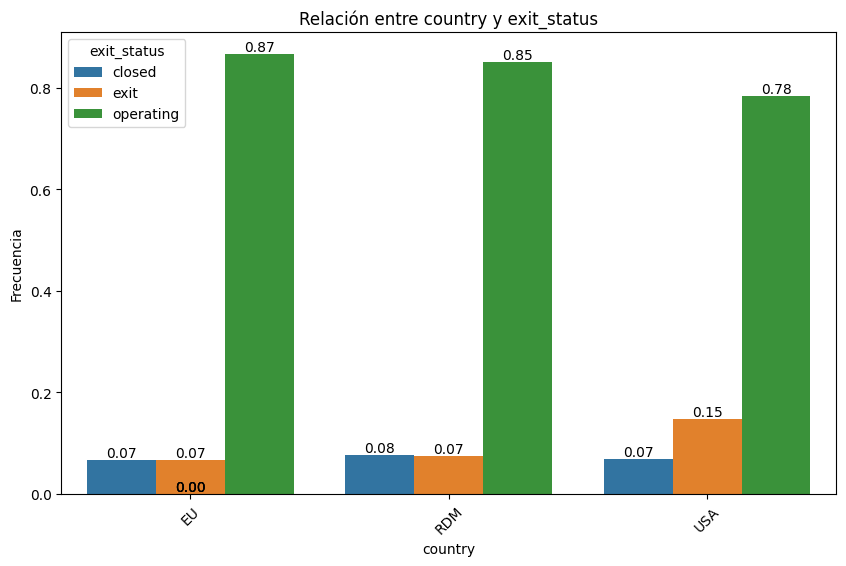

In [117]:
#RELATIVA
plot_categorical_relationship_fin(df, "country","exit_status", relative_freq=True, show_values= True)

En terminos absolutos, en USA hay la mayor cantidad de startup exitas, aun operativa pero tambien el mayor numero de startup que han fallido.
En terminos relativos vemos que el failure rate es similar en USA-RDM y EU,pero en USA el % de startup exitosa es mas alto.
Puedo pensar que el exito depende del pais.
El test Chi2 abajo aplicado lo confirma. Existe correlacion
- USA es el pais donde mas exito hay en porcentaje, EU y RDM tienen % similares

Aplico test Chi2 - aunque habria que evaluarlo porque el dataset rapresenta todas las grandes startups hasta la fecha(2015)

In [119]:
tabla_contingencia_country = pd.crosstab(df['exit_status'], df['country'])

tabla_contingencia_country


country,EU,RDM,USA
exit_status,,,
closed,462,504,1739
exit,469,491,3719
operating,6038,5640,19734


In [120]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_country)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 503.87525439216887
P-Value: 9.725057215061435e-108
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[  485.90434581   462.61663574  1756.47901846]
 [  840.4977575    800.21561501  3038.28662749]
 [ 5642.59789669  5372.16774925 20397.23435406]]


In [121]:
tabla_contingencia_rounds = pd.crosstab(df['exit_status'], df['funding_rounds'])

tabla_contingencia_rounds


funding_rounds,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
exit_status,,,,,,,,,,,,,,,,,,,
closed,1715,588,206,99,44,23,11,11,5,1,1,0,0,1,0,0,0,0,0
exit,1641,1139,787,476,260,171,85,44,23,22,17,4,4,1,2,1,1,1,0
operating,16442,7324,3671,1816,1002,511,292,141,87,49,29,21,10,4,3,5,2,2,1


In [122]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_rounds)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
#print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 960.7800437823347
P-Value: 2.635763966696097e-178
Grados de Libertad: 36


In [127]:
# % exito/Fracaso por pais
data = {
    'country': ['EU', 'RDM', 'USA'],
    'closed': [462, 504, 1739],
    'exit': [469, 491, 3719]
}

tabla = pd.DataFrame(data)
tabla

,country,closed,exit
0,EU,462,469
1,RDM,504,491
2,USA,1739,3719


NameError: name 'df_country_exit' is not defined

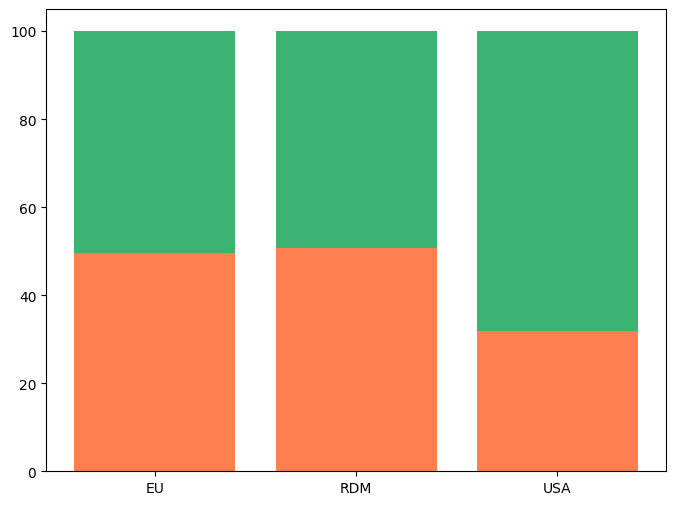

In [128]:
# Calcular el porcentaje por país
tabla['total'] = tabla['closed'] + tabla['exit']  # Total por país
tabla['closed_pct'] = tabla['closed'] / tabla['total'] * 100  # Porcentaje de "closed"
tabla['exit_pct'] = tabla['exit'] / tabla['total'] * 100      # Porcentaje de "exit"

# Configurar el gráfico de barras apiladas
plt.figure(figsize=(8, 6))

# Crear las barras apiladas con porcentajes
plt.bar(tabla['country'], tabla['closed_pct'], label='Closed', color='coral') 
plt.bar(tabla['country'], tabla['exit_pct'], bottom=tabla['closed_pct'],label='Exit',  color='mediumseagreen') # 

#Añadir etiquetas de porcentaje encima de las barras
for i, row in df_country_exit.iterrows():
    plt.text(i, row['closed_pct'] / 2, f"{row['closed_pct']:.1f}%", ha='center', color='black')
    plt.text(i, row['closed_pct'] + row['exit_pct'] / 2, f"{row['exit_pct']:.1f}%", ha='center', color='white')

# Personalizar el gráfico
plt.title('% Exito/Fracaso por Pais')
#plt.xlabel('Country')
#plt.ylabel('Porcentaje (%)')
#plt.ylim(0, 100)  # Limitar el eje Y al 100%
plt.legend(title='Exit Status')  # Leyenda del gráfico
#plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [124]:
category_counts = filter_exit['sector'].value_counts().head(20)
main_categories = category_counts.index
filtered_sector = filter_exit[filter_exit['sector'].isin(main_categories)]
filtered_sector.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4728 entries, 17555 to 58282
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               4728 non-null   object        
 1   category_list      4728 non-null   object        
 2   funding_total_usd  4728 non-null   float64       
 3   status             4728 non-null   object        
 4   country_code       4728 non-null   object        
 5   region_city        4728 non-null   object        
 6   funding_rounds     4728 non-null   int64         
 7   founded_at         4728 non-null   datetime64[ns]
 8   first_funding_at   4728 non-null   datetime64[ns]
 9   last_funding_at    4728 non-null   datetime64[ns]
 10  founded_at_year    4728 non-null   int64         
 11  country            4728 non-null   object        
 12  sector             4728 non-null   object        
 13  funding_log        4728 non-null   float64       
 14  exit_sta

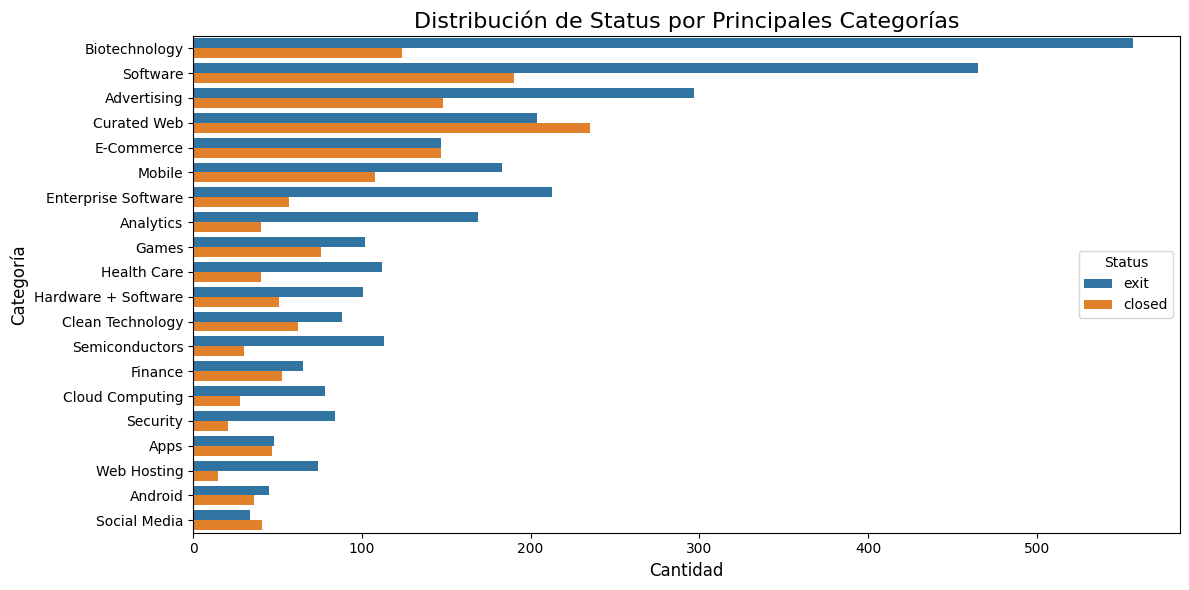

In [125]:
# Gráfico de barras agrupado para 'exit_status' y 'principales sector'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_sector, y='sector', hue='exit_status', order=main_categories)

# Personalizar el gráfico
plt.title('Distribución de Status por Principales Categorías', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Status', loc='center right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [126]:
country_counts = filter_exit['region_city'].value_counts().head(20)
main_country = country_counts.index
filtered_country = filter_exit[filter_exit['region_city'].isin(main_country)]
filtered_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 22888 to 25199
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               4916 non-null   object        
 1   category_list      4916 non-null   object        
 2   funding_total_usd  4916 non-null   float64       
 3   status             4916 non-null   object        
 4   country_code       4916 non-null   object        
 5   region_city        4916 non-null   object        
 6   funding_rounds     4916 non-null   int64         
 7   founded_at         4916 non-null   datetime64[ns]
 8   first_funding_at   4916 non-null   datetime64[ns]
 9   last_funding_at    4916 non-null   datetime64[ns]
 10  founded_at_year    4916 non-null   int64         
 11  country            4916 non-null   object        
 12  sector             4916 non-null   object        
 13  funding_log        4916 non-null   float64       
 14  exit_sta

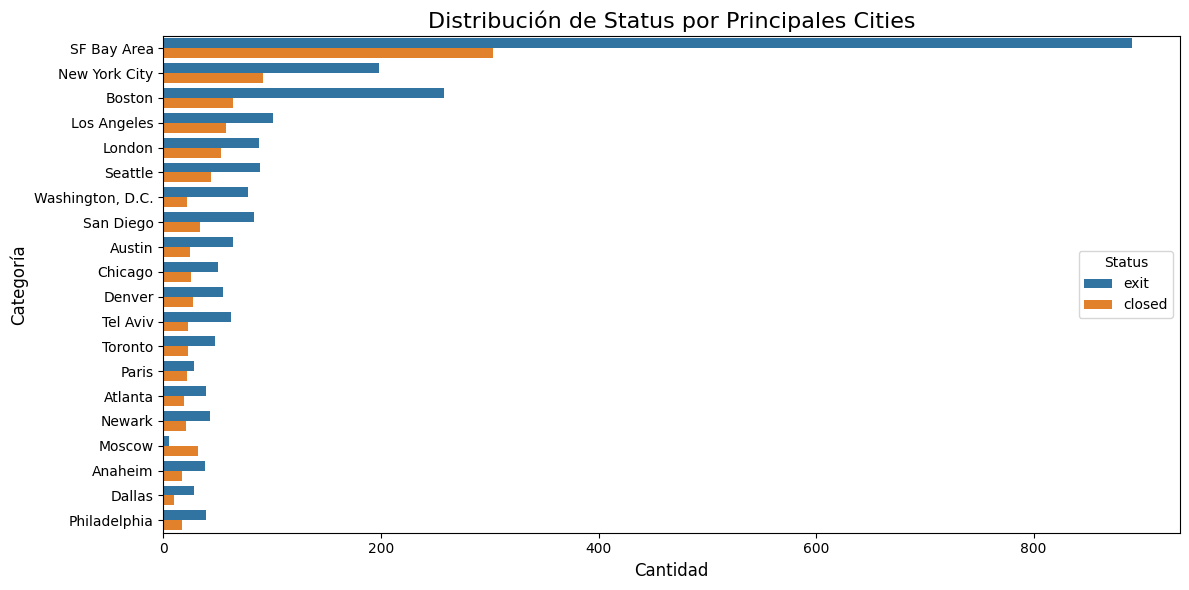

In [147]:
# Gráfico de barras agrupado para 'exit_status' y 'principales cities'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_sector, y='region_city', hue='exit_status', order=main_country)

# Personalizar el gráfico
plt.title('Distribución de Status por Principales Cities', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Status', loc='center right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 22888 to 25199
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               4916 non-null   object        
 1   category_list      4916 non-null   object        
 2   funding_total_usd  4916 non-null   float64       
 3   status             4916 non-null   object        
 4   country_code       4916 non-null   object        
 5   region_city        4916 non-null   object        
 6   funding_rounds     4916 non-null   int64         
 7   founded_at         4916 non-null   datetime64[ns]
 8   first_funding_at   4916 non-null   datetime64[ns]
 9   last_funding_at    4916 non-null   datetime64[ns]
 10  founded_at_year    4916 non-null   int64         
 11  country            4916 non-null   object        
 12  sector             4916 non-null   object        
 13  funding_log        4916 non-null   float64       
 14  exit_sta

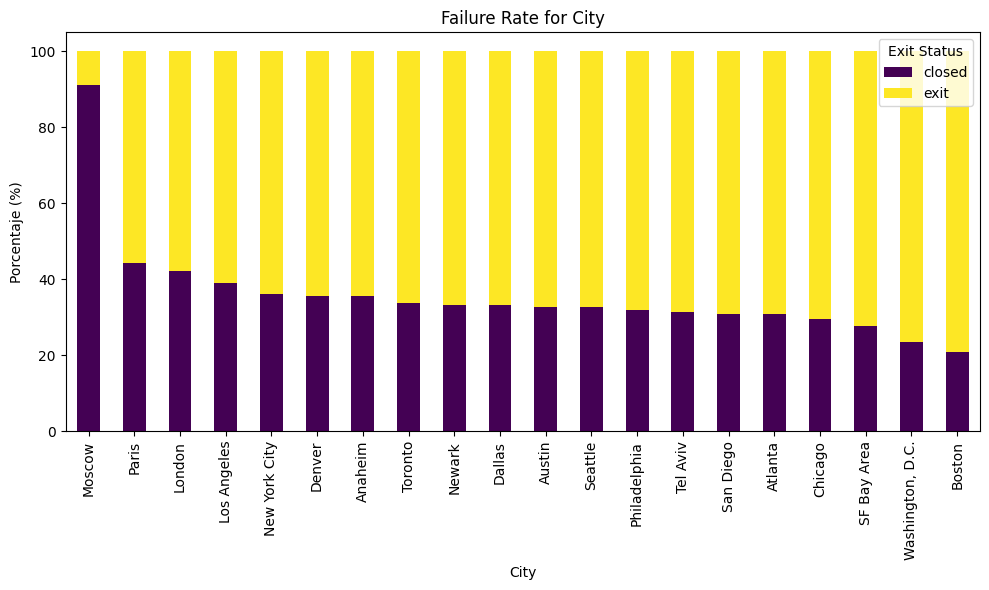

In [148]:
# Calculo la Failure Rate
city_counts = filter_exit['region_city'].value_counts().head(20)
main_city = city_counts.index
filtered_city = filter_exit[filter_exit['region_city'].isin(main_city)]
filtered_city.info()
tabla = pd.crosstab(filtered_city['region_city'], filtered_city['exit_status'], normalize='index') * 100
#Ordeno segun la failure rate
tabla_ordenada = tabla.sort_values(by='closed', ascending=False)

# Creo el gráfico de barras apiladas porcentual
tabla_ordenada.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Personalización graf
plt.title('Failure Rate for City')
plt.xlabel('City')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Exit Status')
plt.tight_layout()

# Grafico
plt.show()

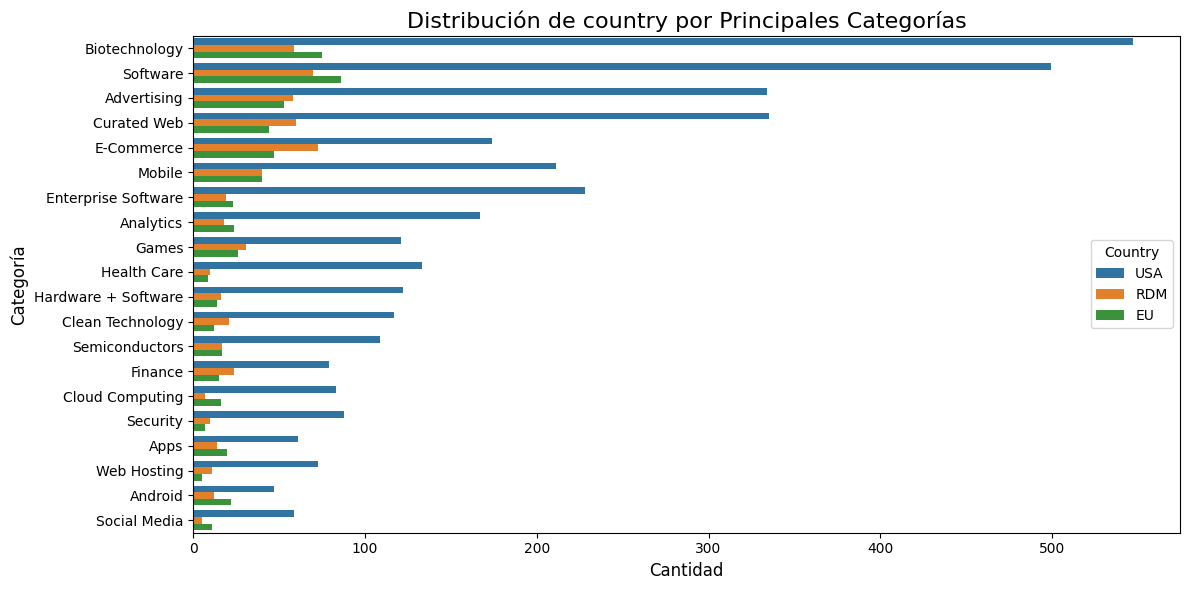

In [146]:
# Gráfico de barras agrupado para 'exit_status' y 'principales sector'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_sector, y='sector', hue='country', order=main_categories)

# Personalizar el gráfico
plt.title('Distribución de country por Principales Categorías', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Country', loc='center right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Analizando country y sector, la tendencia es la misma como esperado, que la mayoria de las startups de exito està en USA.
del grafico anterior, fijarse como E-commerce tiene misma % de exito y fracaso y curiosamente, aunque tambien prevalentemente en USA, muchas startups en este sector han sido creada en RDM, que tiene una tasa de fracaso superior a USA

### Analisis Bivariante con variables Numericas

(2,)


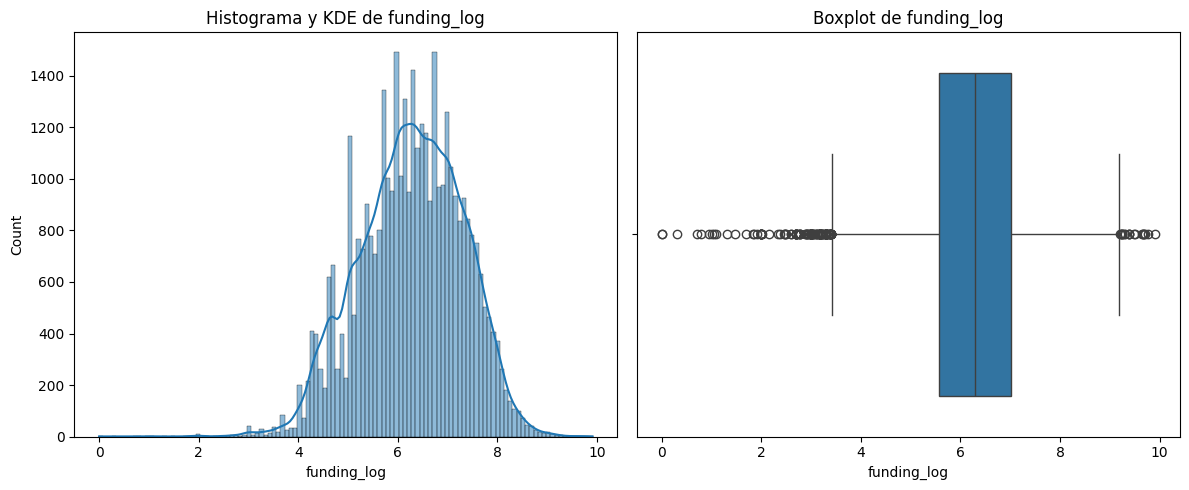

In [129]:
plot_combined_graphs(df, ["funding_log"], whisker_width= 1.5)

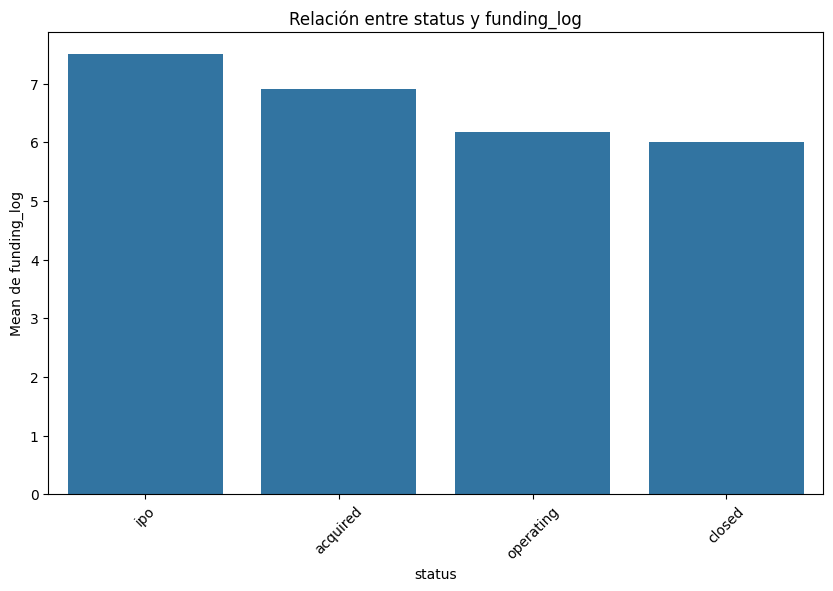

In [130]:
plot_categorical_numerical_relationship(df,"status","funding_log", measure = "mean")

In [131]:
#groupby status y analissi descriptivo de funding
df.groupby('status')['funding_log'].describe() /len(df) * 100


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,9.467471,0.017790,0.001974,0.008187,0.016681,0.018043,0.019174,0.025170
closed,6.972368,0.015490,0.002636,0.005155,0.013664,0.015466,0.017471,0.023701
ipo,2.593051,0.019329,0.001985,0.009285,0.018142,0.019540,0.020656,0.025036
operating,80.967110,0.015918,0.002616,0.000000,0.014118,0.015992,0.017793,0.025555


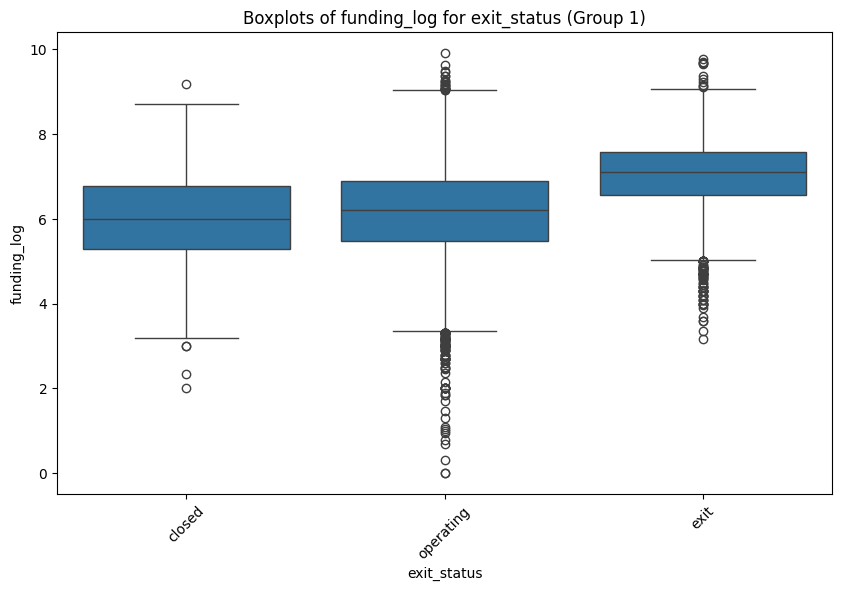

In [132]:
plot_grouped_boxplots(df,"exit_status","funding_log")

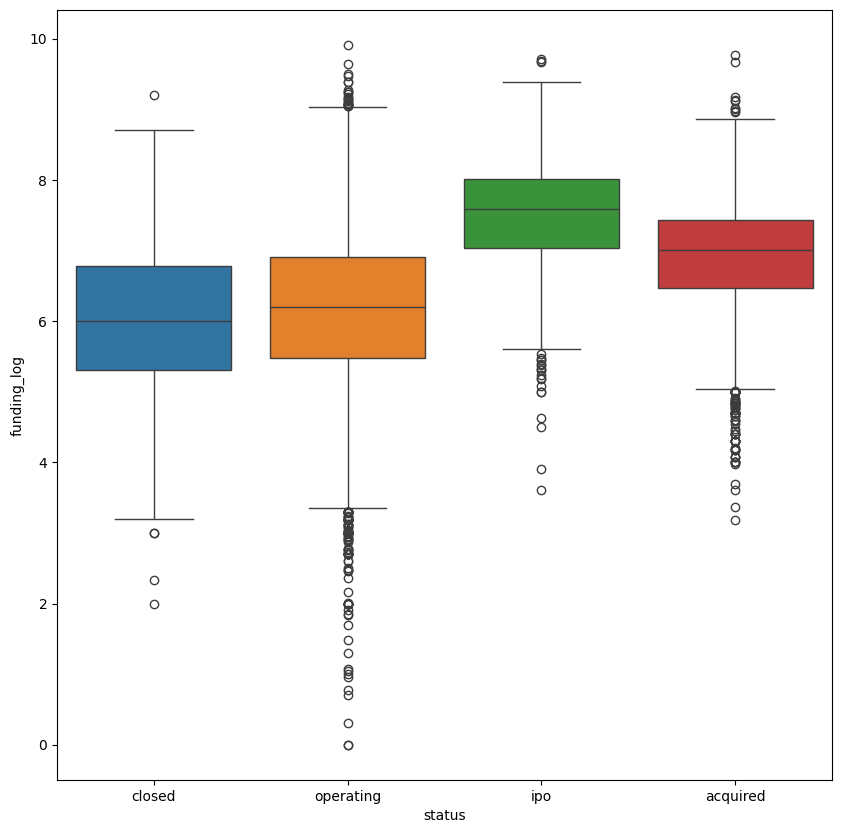

In [133]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "status",
            y = "funding_log",
            hue = "status",
            data=df);

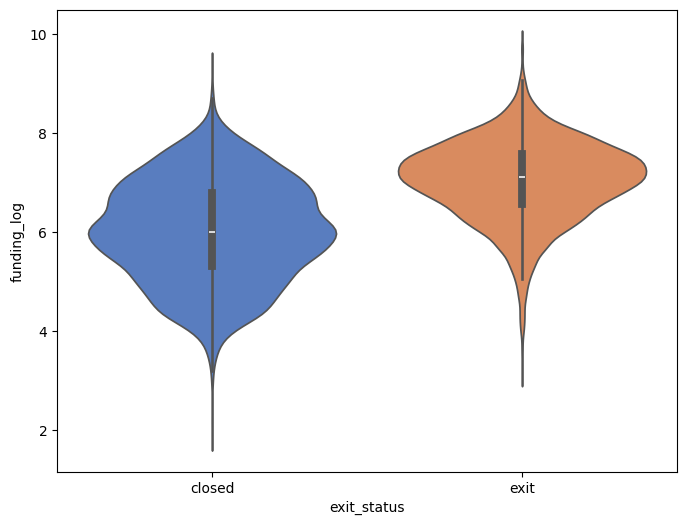

In [149]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='exit_status', y='funding_log', data=filter_exit, hue = 'exit_status',palette='muted')

# Personalización graf
#plt.title('Gráfico de Violín entre Exit Status y Funding Log')
#plt.xlabel('Exit Status')
#plt.ylabel('Funding Log')
#plt.tight_layout()

# Grafico
plt.show()

Comparación entre status:
- Startups cerradas: Presentan una mediana de financiamiento menor en comparación con las otras dos categorías. Esto sugiere que, en promedio, las startups que cerraron recibieron menos financiamiento.
- Startups operativas: Tienen una mediana de financiamiento similar a las startups que cerraron, pero con una mayor dispersión de los datos. Esto indica que hay startups operativas que recibieron tanto poco como mucho financiamiento.
- Startups que salieron del mercado: salir a bolsa (IPO: Initial Public Offering - Oferta pública de acciones) o ser adquiridos por privados. Presentan la mediana de financiamiento más alta, lo que sugiere que, en promedio, las startups que tuvieron éxito recibieron más financiamiento. entre IPO y adquired, las que salieron a bolsa presentan los mejor datos

#### Conclusiones preliminares:

Basándonos en este gráfico, podemos inferir que existe una tendencia a que las startups que reciben más financiamiento tengan más probabilidades de tener éxito (salir del mercado)

Las startups que reciben mas financiacion tiene mas probabilidad de exito : es decir de salir a bolsa (IPO: Initial Public Offering - Oferta pública de acciones) o ser adquiridos por privados

Tambien tienen mas rondas de financiacion

Parece ser que hay una relacion entre ronda de financiacion y exito y entre financiacion total y exito, como esperado

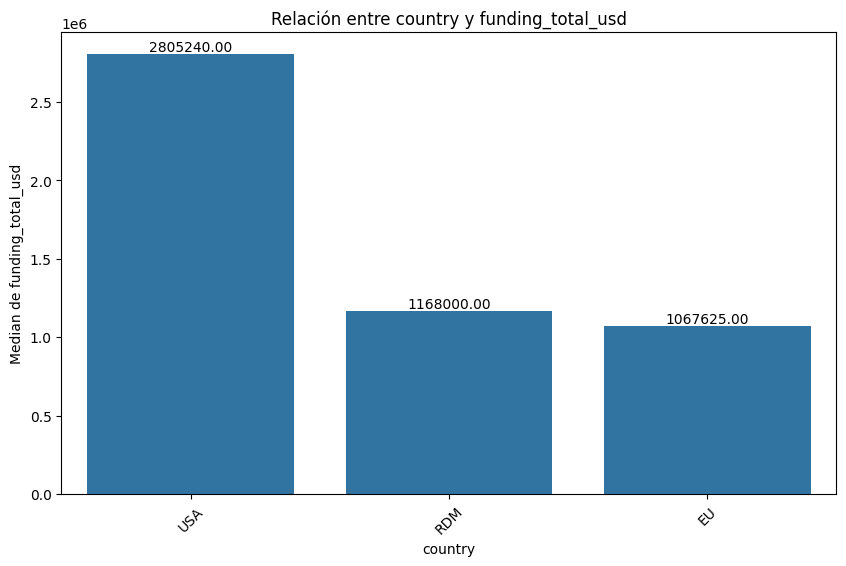

In [134]:
plot_categorical_numerical_relationship(df,"country","funding_total_usd", show_values=True, measure = "median")

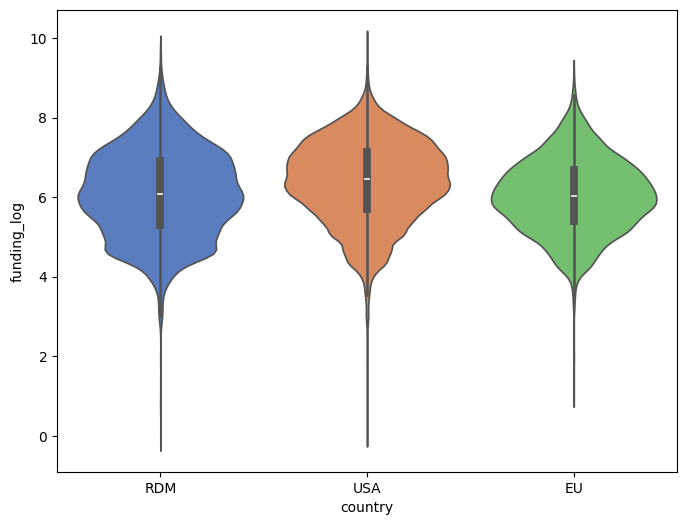

In [150]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='country', y='funding_log', data=df, hue = 'country', palette='muted')

# Personalización del gráfico
#plt.title('Gráfico de Violín entre Country y Funding Log')
#plt.xlabel('Country')
#plt.ylabel('Funding Log')
#plt.tight_layout()

# Grafico
plt.show()

USA efectivamente recibe mas financiacion

#### Analisis MULTIVARIANTE : entre CATEGORICAS

Análisis entre : exit_status - sector - country

variable target : exit_status

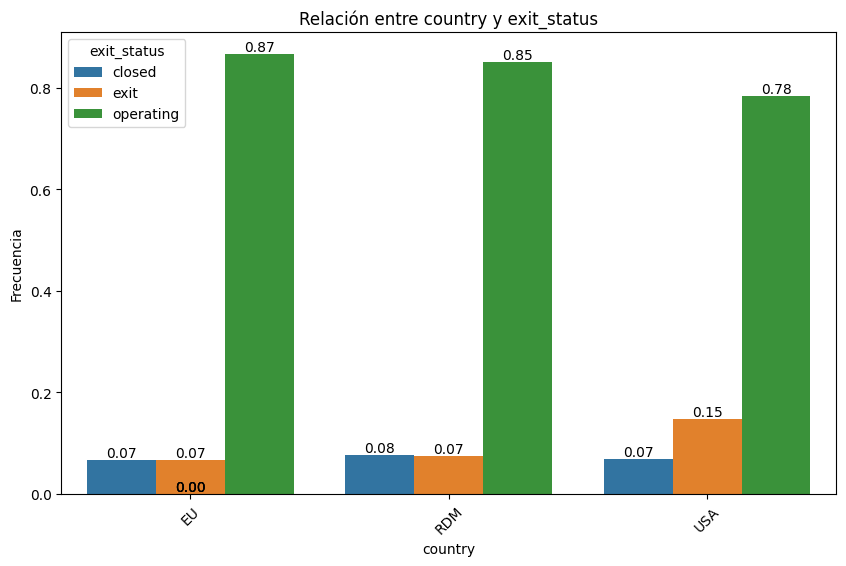

In [135]:
plot_categorical_relationship_fin(df,"country","exit_status", relative_freq= True, show_values= True)

In [137]:
#creo un diccionario por los valores de EXIT y CLOSED de exit_status
# para representar la tasa de succeso o fallido por principales sector y country

columnas = ["exit_status","country","sector", "country_code", "funding_log", "funding_rounds", "funding_total_usd" ] 
col_directora = "exit_status"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
col_3 = [col for col in columnas if col != col_directora][2]
col_4 = [col for col in columnas if col != col_directora][3]
col_5 = [col for col in columnas if col != col_directora][4]
col_6 = [col for col in columnas if col != col_directora][5]
diccionario_multivariante_exit = {}
diccionario_multivariante_closed = {}
diccionario_multivariante_operating = {}
for valor in df[col_directora].unique():
    if valor == "exit":
        diccionario_multivariante_exit[valor] = df.loc[df[col_directora] == valor,[col_2,col_1,col_3,col_4,col_5,col_6]]
    elif valor =="closed":
        diccionario_multivariante_closed[valor] = df.loc[df[col_directora] == valor,[col_2,col_1,col_3,col_4,col_5,col_6]]
    else :
        diccionario_multivariante_operating[valor] = df.loc[df[col_directora] == valor,[col_2,col_1,col_3,col_4,col_5,col_6]]

    # Ojo al orden quiero ver para cada oferta como es la distribución de educacion


diccionario_multivariante_exit
diccionario_multivariante_closed

{'closed':                         sector country country_code  funding_log  \
 35748               Automotive     RDM          BRA     5.677607   
 17776  Electrical Distribution     RDM          BRA     7.214670   
 60436            Biotechnology     USA          USA     7.576917   
 56314            Biotechnology     USA          USA     6.763451   
 55607      Health and Wellness     USA          USA     6.473049   
 ...                        ...     ...          ...          ...   
 25127                 Delivery     USA          USA     5.322219   
 58282                     Apps      EU          ESP     5.101943   
 44639                    Other     RDM          ARE     5.778151   
 25199     E-Commerce Platforms     USA          USA     5.397940   
 48204                    Other     RDM          GEO     3.626311   
 
        funding_rounds  funding_total_usd  
 35748               1       4.760000e+05  
 17776               1       1.639344e+07  
 60436               4      

In [138]:
# df STARTUPS_EXIT
for valor,startups_exit in diccionario_multivariante_exit.items():
    print(f"Respuesta {valor}:")
    print(startups_exit)

Respuesta exit:
                      sector country country_code  funding_log  \
22888          Manufacturing     USA          USA     6.253175   
14102  Public Transportation     USA          USA     8.477121   
12671                  Other      EU          GBR     6.477121   
17555    Hardware + Software     USA          USA     7.695482   
36774            Health Care     USA          USA     6.493341   
...                      ...     ...          ...          ...   
48161                   Chat     USA          USA     6.000000   
24779         Consumer Goods     USA          USA     4.633468   
5183             Health Care      EU          GBR     7.534026   
6757                Internet     RDM          IND     5.778151   
54123                 Travel      EU          HRV     4.301030   

       funding_rounds  funding_total_usd  
22888               2          1791329.0  
14102               1        300000000.0  
12671               1          3000000.0  
17555              

C:\Users\PC\AppData\Local\Temp\ipykernel_3188\81020450.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



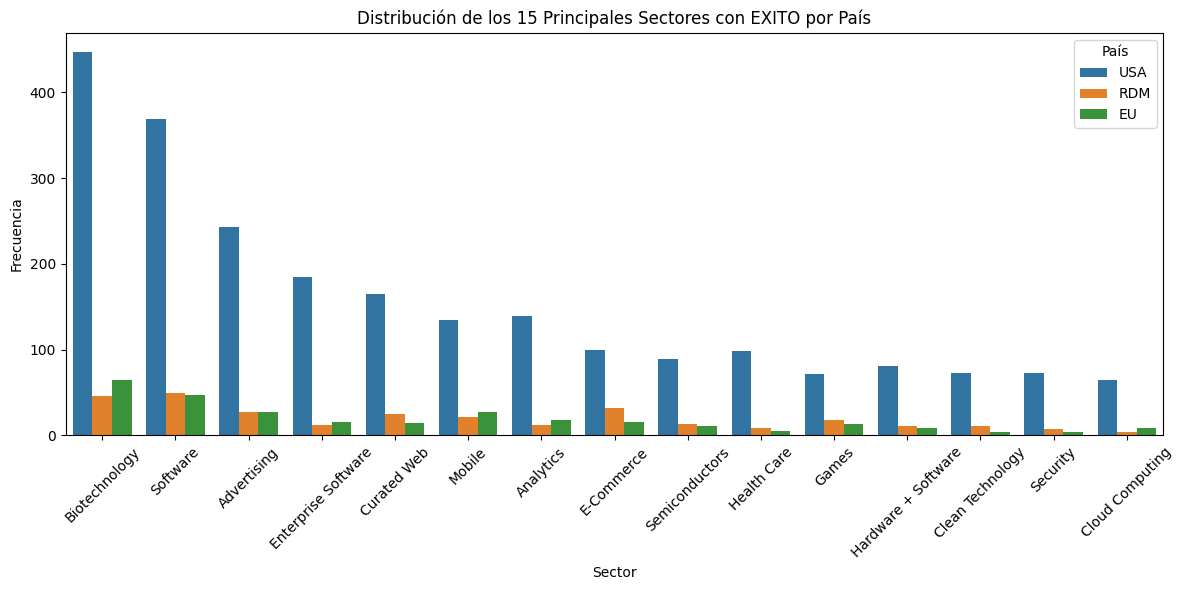

In [139]:
# Identifico los 15 sectores más frecuentes
top_sectors_exit = startups_exit['sector'].value_counts().nlargest(15)
top_sectors_exit_i = startups_exit['sector'].value_counts().nlargest(15).index
filtered_df_exit = startups_exit[df['sector'].isin(top_sectors_exit_i)]

# Gráfico 15 Principales Sectores con EXITO por País
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df_exit, x='sector', hue='country', order=top_sectors_exit_i)
plt.title("Distribución de los 15 Principales Sectores con EXITO por País")
plt.xlabel("Sector")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.legend(title="País")
plt.tight_layout()
plt.show()

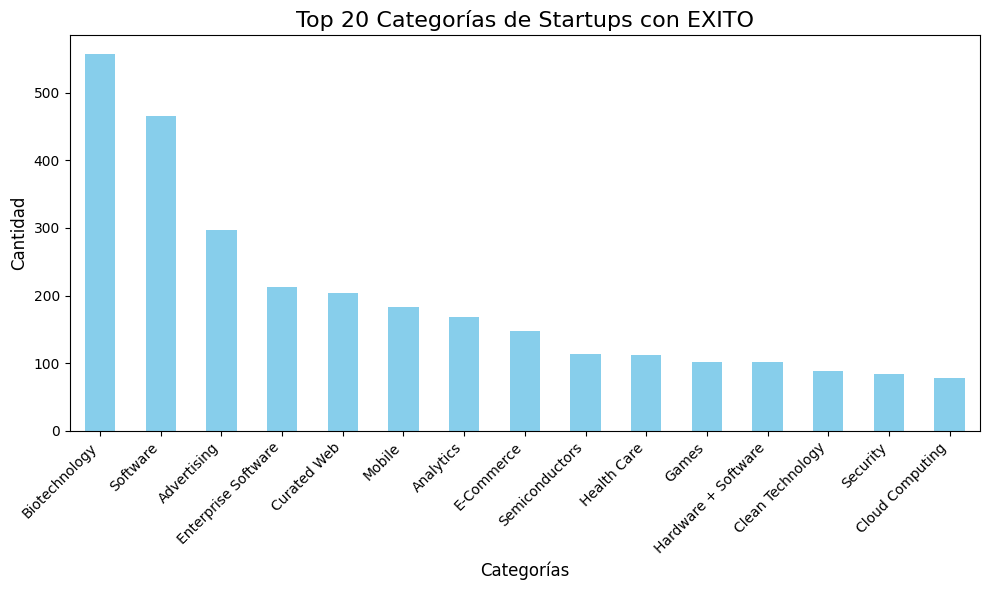

In [140]:
plt.figure(figsize=(10, 6))
top_sectors_exit.plot(kind='bar', color='skyblue')
plt.title('Top 20 Categorías de Startups con EXITO', fontsize=16)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [141]:
# df STARTUPS_FAIL
for valor,startups_fail in diccionario_multivariante_closed.items():
    print(f"Respuesta {valor}:")
    print(startups_fail)

Respuesta closed:
                        sector country country_code  funding_log  \
35748               Automotive     RDM          BRA     5.677607   
17776  Electrical Distribution     RDM          BRA     7.214670   
60436            Biotechnology     USA          USA     7.576917   
56314            Biotechnology     USA          USA     6.763451   
55607      Health and Wellness     USA          USA     6.473049   
...                        ...     ...          ...          ...   
25127                 Delivery     USA          USA     5.322219   
58282                     Apps      EU          ESP     5.101943   
44639                    Other     RDM          ARE     5.778151   
25199     E-Commerce Platforms     USA          USA     5.397940   
48204                    Other     RDM          GEO     3.626311   

       funding_rounds  funding_total_usd  
35748               1       4.760000e+05  
17776               1       1.639344e+07  
60436               4       3.775000

In [142]:
# Identifico los 15 sectores más frecuentes
top_sectors_fail = startups_fail['sector'].value_counts().nlargest(15)
top_sectors_fail_i = startups_fail['sector'].value_counts().nlargest(15).index
filtered_df_fail = startups_fail[df['sector'].isin(top_sectors_fail_i)]


C:\Users\PC\AppData\Local\Temp\ipykernel_3188\1262724608.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



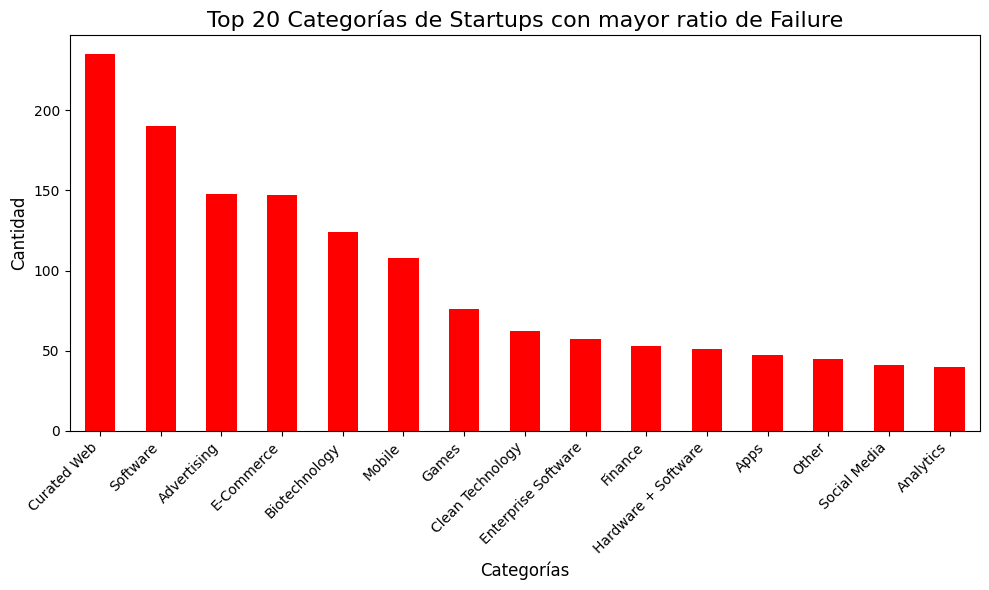

In [144]:
plt.figure(figsize=(10, 6))
top_sectors_fail.plot(kind='bar', color='red')
plt.title('Top 20 Categorías de Startups con mayor ratio de Failure', fontsize=16)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

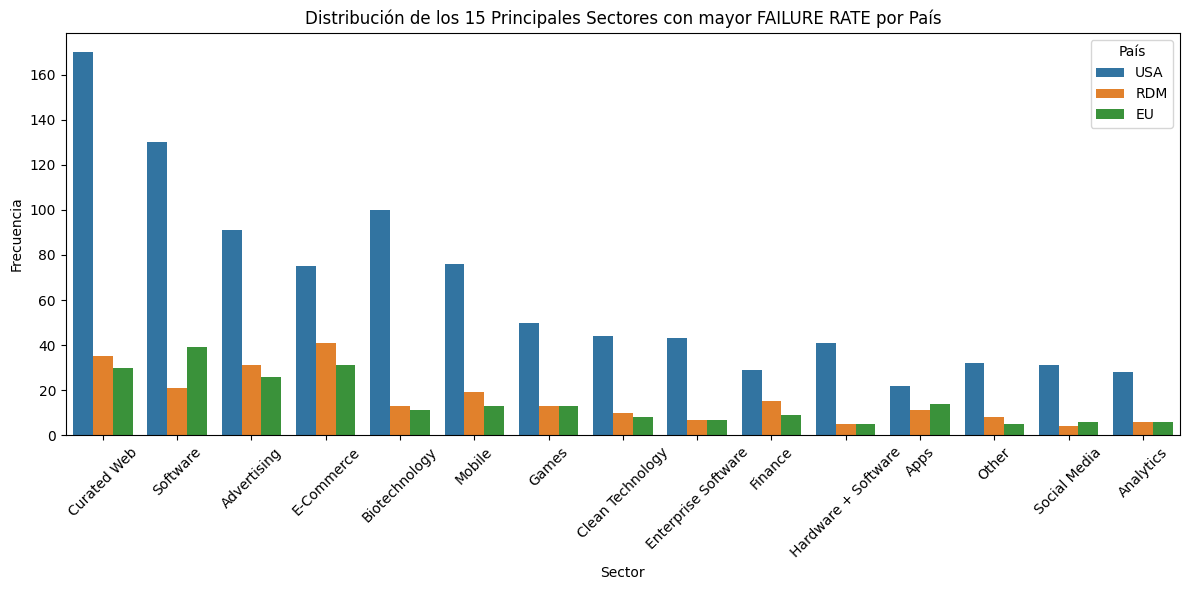

In [145]:
# Gráfico 15 Principales Sectores con FAIL por País
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df_fail, x='sector', hue='country', order=top_sectors_fail_i)
plt.title("Distribución de los 15 Principales Sectores con mayor FAILURE RATE por País")
plt.xlabel("Sector")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.legend(title="País")
plt.tight_layout()
plt.show()

Los sectores dominantes son las mencionados, que tiene un peso relativo similar en USA y en EU, menos significativo en RDM

- Comparación:
 - Sectores con éxito vs. fracaso:
   - Software y Advertising aparecen en ambos gráficos, lo que indica que tienen tanto potencial para el éxito como para el fracaso.
   - Biotechnology está principalmente asociado con el éxito, mientras que Curated Web domina los fracasos.
 - Región:
  -En USA, se concentra la mayor cantidad de empresas tanto exitosas como fallidas, lo que refleja un ecosistema empresarial grande y competitivo.
  -EU y RDM muestran menor intensidad en ambos gráficos, sugiriendo menor participación en general o más cautela en sectores riesgosos.
Conclusión general:
- Sectores tecnológicos (como Software, Curated Web, y Advertising) tienen alta actividad empresarial pero también riesgos asociados.
- Sectores como Biotechnology parecen ser más seguros y orientados al éxito, especialmente en USA.


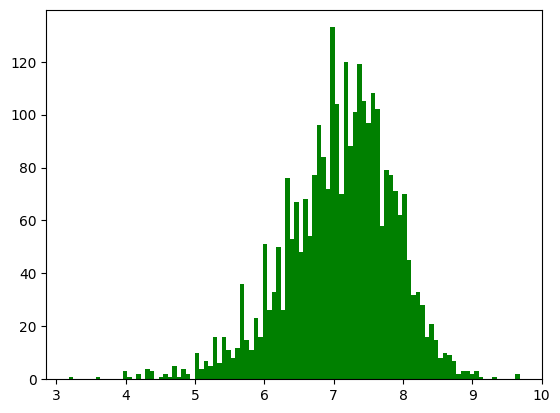

In [156]:
#Distribucion financiamiento a empresas de exito
plt.hist(filtered_df_exit.funding_log, bins=100, range=None, density=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color='green', label=None, stacked=False);

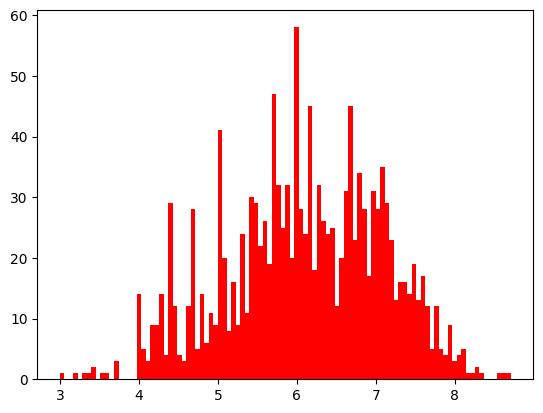

In [155]:
#Distribucion financiamiento a empresas que han fracasado
plt.hist(filtered_df_fail.funding_log, bins=100, range=None, density=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color='red', label=None, stacked=False);

Comparando la distribución del financiamiento para startups exitosas y otro para startups fracasadas, vemos que el histograma de las startups exitosas está ligeramente desplazado hacia la derecha (es decir, muestra valores de financiamiento más altos), entonces  tienden a recibir más financiamiento. 
Sin emnargo tambien hayq ue considera otros factores no objecto de este analisis para determinar la cantidad de finacniamiento que se otorga - por ex proyecto actrativos, innovadores, ect..

#### Analisis MULTIVARIANTE : entre NUMERICAS



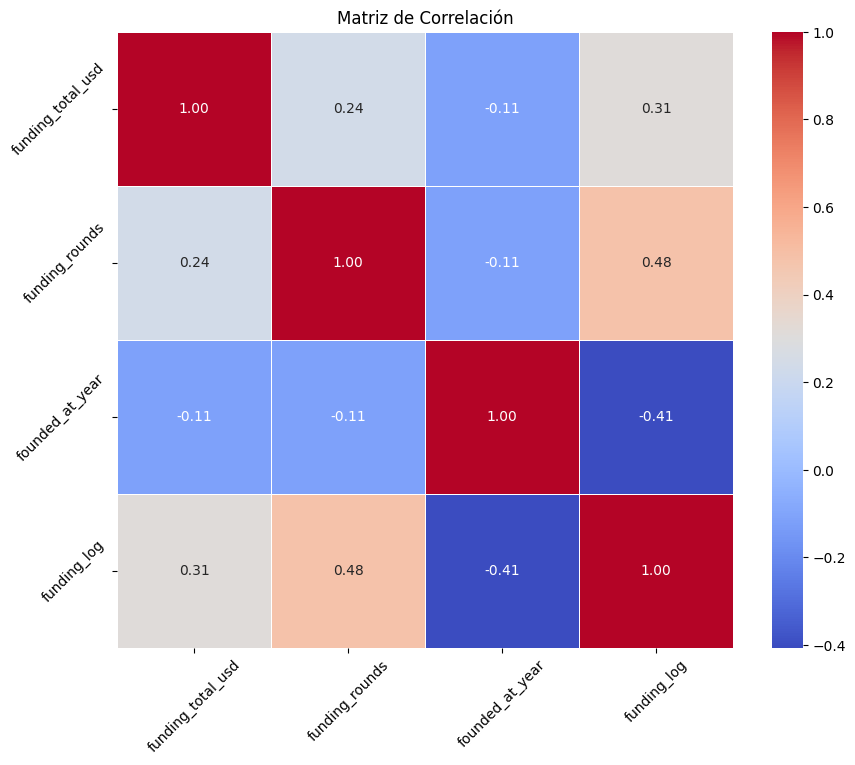

In [121]:
corr_matrix = df.corr(numeric_only= True) 
corr_matrix

plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

El Heatmap nos dice que hay correlacion, aunque no muy fuerte, entre financiamiento y numeros de rondas

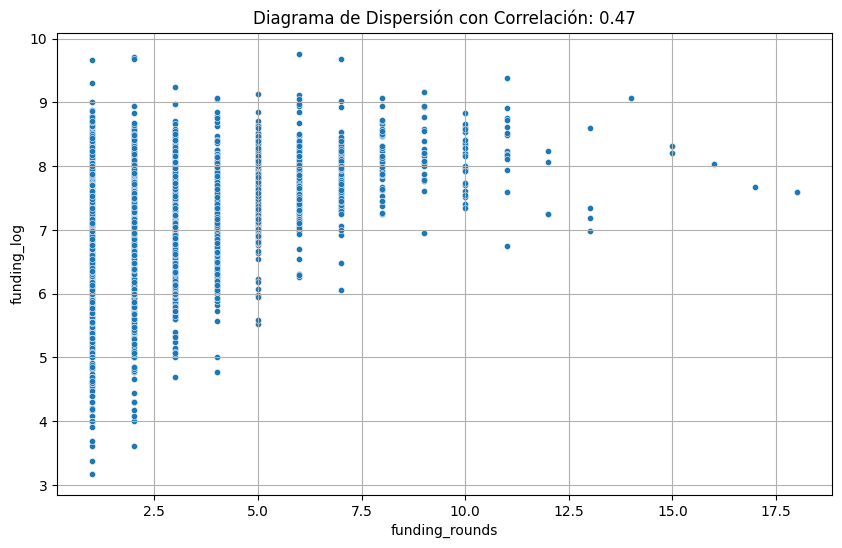

In [123]:
#analisis entre funding_log y funding_rounds para startups exitosa
grafico_dispersion_con_correlacion(startups_exit,col_5,col_4, tamano_puntos=20, mostrar_correlacion= True)

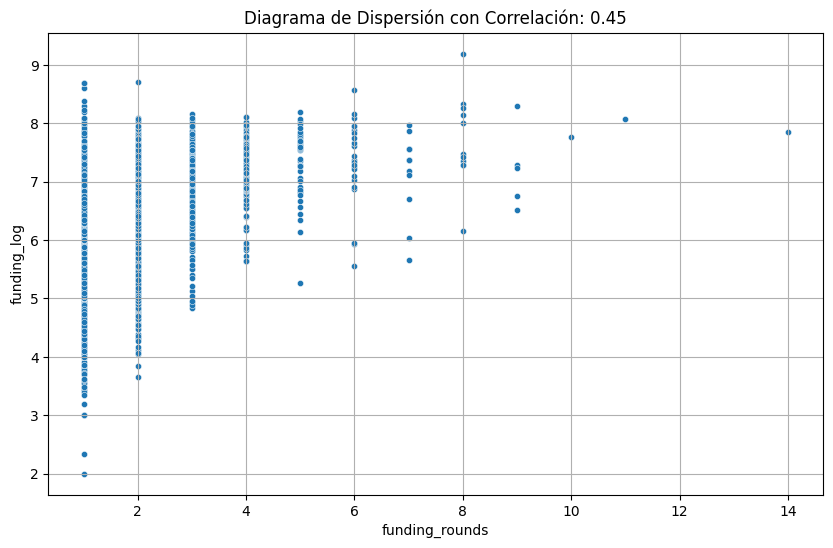

In [124]:
#analisis entre funding_log y funding_rounds para startups que han fracasado
grafico_dispersion_con_correlacion(startups_fail,col_5,col_4, tamano_puntos=20, mostrar_correlacion= True)

In [ ]:
#muestro Percentiles de funding_log vs Status

C:\Users\PC\AppData\Local\Temp\ipykernel_3188\3675473332.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



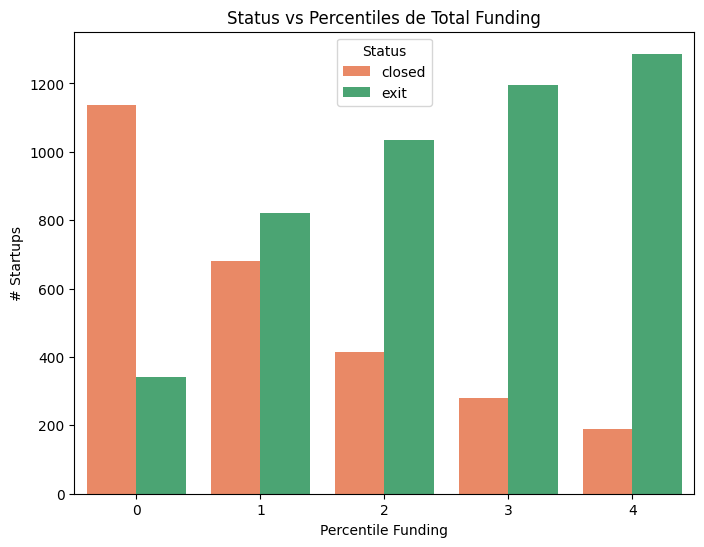

In [151]:
# Nueva columna con percentiles (5) de Total Funding
filter_exit['funding_percentile'] = pd.qcut(filter_exit['funding_total_usd'], q=5, labels=False, duplicates='drop')

# cuento el número de startups en cada estado por percentil
status_percentile = filter_exit.groupby(['funding_percentile', 'exit_status']).size().reset_index(name='count')

# Creacion graf
plt.figure(figsize=(8, 6))
sns.barplot(
    data=status_percentile, 
    x='funding_percentile', 
    y='count', 
    hue='exit_status', 
    palette={'exit': 'mediumseagreen', 'closed': 'coral'}
)
plt.xlabel("Percentile Funding")
plt.ylabel("# Startups")
plt.title("Status vs Percentiles de Total Funding")
plt.legend(title="Status")
plt.show()

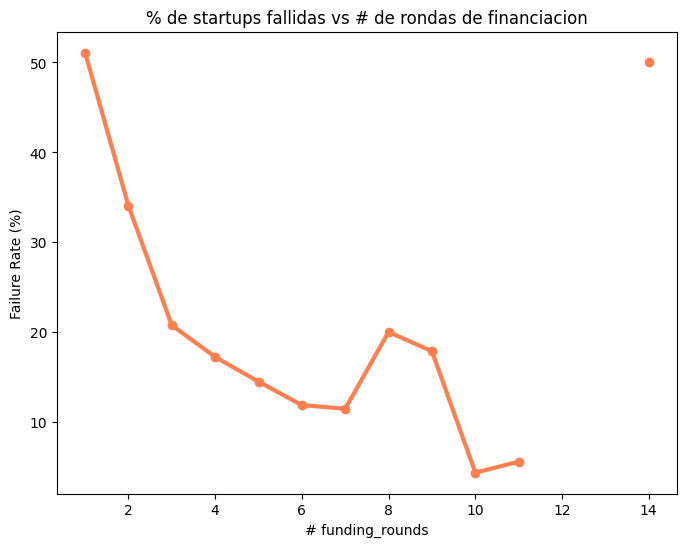

In [152]:
# Calculo la tasa de fracaso por número de rondas
failure_rate = filter_exit[filter_exit['exit_status'] == 'closed'].groupby('funding_rounds').size() / filter_exit.groupby('funding_rounds').size()
#failure_rate = failure_rate.fillna(0)  # Llenar valores faltantes con 0

# Creacion grafico
plt.figure(figsize=(8, 6))
plt.plot(failure_rate.index, failure_rate.values * 100, marker='o', linestyle='-', linewidth=3, color='coral')
plt.xlabel("# funding_rounds")
plt.ylabel("Failure Rate (%)")
plt.title("% de startups fallidas vs # de rondas de financiacion")
plt.grid(False)
plt.show()
